In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import random
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from scipy import stats
# from matplotlib_venn import venn2
from sklearn.metrics import roc_curve, roc_auc_score

In [361]:
import os
import re
import numpy as np

# Define the folder containing the files
folder_path = '/Users/benkuznets-speck/Documents/complex_traits/data_aa_lam/data'
folder_path = '/Users/benkuznets-speck/Documents/complex_traits/data_aa_lam_2/data'
folder_path = '/Users/benkuznets-speck/Documents/complex_traits/data_aa_lam_3/data'
# folder_path = '/Users/benkuznets-speck/Documents/complex_traits/data_aa_lam_4/data' #averaged perturbations

# Initialize lists to store the data
uoptf = []
R2f = []
maguf = []

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    if filename.startswith('uopt_forward'):
        # Extract indices from the filename using regular expressions
        match = re.match(r'uopt_forward_(\d+)_(\d+).npy', filename)
        if match:
            ind1, ind2 = map(int, match.groups())
            
            # Load uopt_forward file
            uopt_forward = np.load(os.path.join(folder_path, filename))
#             for i in range(len(uopt_forward)):
            uoptf.append(uopt_forward[6])
            
            # Load corresponding R2f file
            R2f_filename = f'R2f_{ind1}_{ind2}.npy'
            R2f_filepath = os.path.join(folder_path, R2f_filename)
            R2f_data = np.load(R2f_filepath)
            R2f.append(R2f_data)
            
            maguf_filename = f'magu_f_{ind1}_{ind2}.npy'
            maguf_filepath = os.path.join(folder_path, maguf_filename)
            maguf_data = np.load(maguf_filepath)
            maguf.append(maguf_data)
            
            
Af = np.asarray(uoptf)
            
# Initialize lists to store the data
uoptr = []
R2r = []
magur = []

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    if filename.startswith('uopt_reverse'):
        # Extract indices from the filename using regular expressions
        match = re.match(r'uopt_reverse_(\d+)_(\d+).npy', filename)
        if match:
            ind1, ind2 = map(int, match.groups())
            
            # Load uopt_forward file
            uopt_reverse = np.load(os.path.join(folder_path, filename))
#             for i in range(len(uopt_reverse)):
            uoptr.append(uopt_reverse[6])
            
            # Load corresponding R2f file
            R2r_filename = f'R2r_{ind1}_{ind2}.npy'
            R2r_filepath = os.path.join(folder_path, R2r_filename)
            R2r_data = np.load(R2r_filepath)
            R2r.append(R2r_data)
            
            magur_filename = f'magu_r_{ind1}_{ind2}.npy'
            magur_filepath = os.path.join(folder_path, magur_filename)
            magur_data = np.load(magur_filepath)
            magur.append(magur_data)
           


        
Ar = np.asarray(uoptr)


In [42]:
gene_perts

rid
43212     RPAP3
43215     RPAP3
43216     RPAP3
43218     HSPA5
43223     HSPA5
          ...  
52994      YBX3
52995     ZC3H8
52996    ZNF622
52997    ZRANB2
59880       ZFX
Name: fin_genotype, Length: 1225, dtype: object

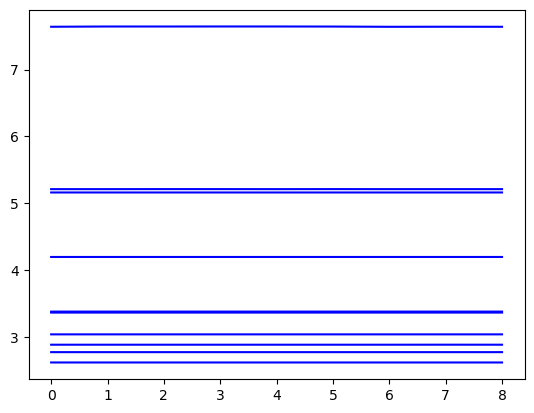

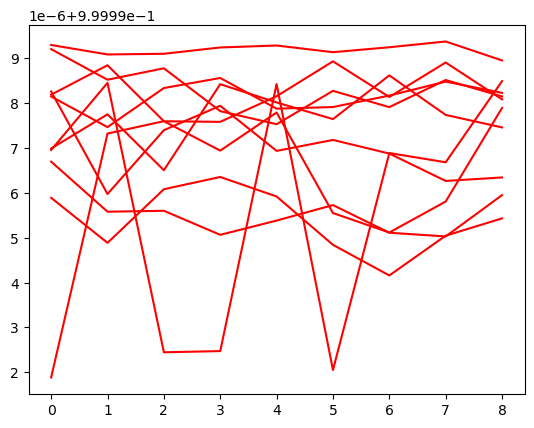

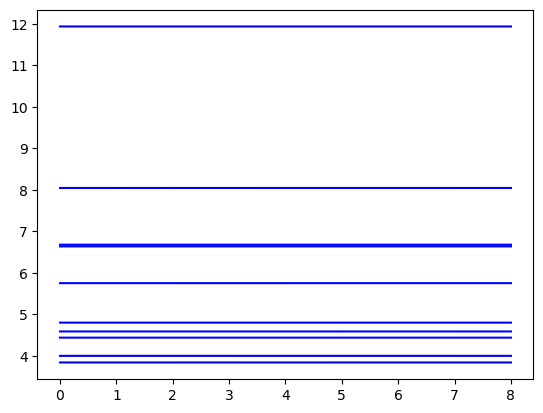

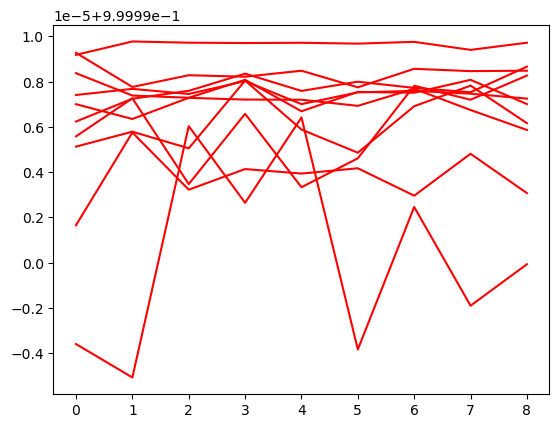

In [173]:
for i in range(10):
    plt.plot(maguf[i], 'b')
#     plt.plot(R2f[i], 'r')
plt.show()

for i in range(10):
#     plt.plot(maguf[i], 'b')
    plt.plot(R2f[i], 'r')
plt.show()


for i in range(10):
    plt.plot(magur[i], 'b')
#     plt.plot(R2r[i], 'r')
plt.show()

for i in range(10):
#     plt.plot(magur[i], 'b')
    plt.plot(R2r[i], 'r')
plt.show()

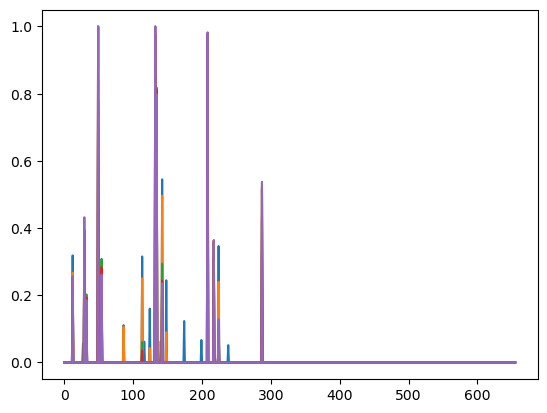

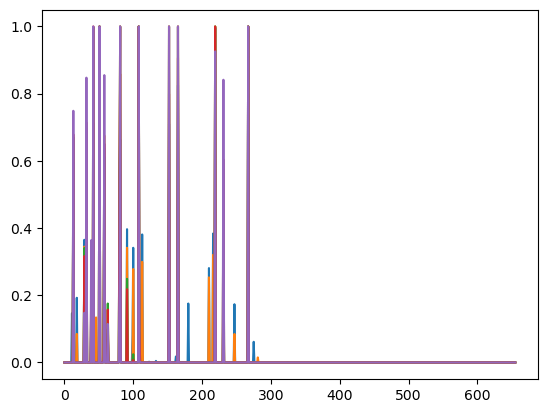

In [82]:
for i in range(10, 15):
    plt.plot(uoptf[i])
    
plt.show()

for i in range(10,15):
    plt.plot(uoptr[i])
    
plt.show()

In [40]:
Af

array([[ 9.34855169e-14,  3.45813279e-14,  6.51771111e-14, ...,
         1.04685345e-13,  1.02369910e-13,  1.01356168e-13],
       [-7.71840222e-13, -1.78475748e-13, -7.36679582e-13, ...,
        -8.49830263e-13, -8.52001181e-13, -8.21063802e-13],
       [-2.18123791e-12, -1.83110940e-12, -1.53931306e-12, ...,
        -1.90398157e-12, -1.89907653e-12, -1.81284808e-12],
       ...,
       [ 5.01215498e-13,  4.57925482e-13,  1.75016077e-13, ...,
         4.65545628e-13,  4.61359407e-13,  4.55442592e-13],
       [-9.92084745e-13, -7.40619256e-13, -1.75425997e-12, ...,
        -1.08270058e-12, -1.09089136e-12, -1.06131193e-12],
       [-6.73797460e-13, -5.07357354e-13, -4.25038650e-13, ...,
        -7.60721288e-13, -7.67913885e-13, -7.34471890e-13]])

In [44]:
nonzero_columns_mask = np.any(Af != 0, axis=0)
nonzero_columns_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [362]:
import cmapPy
import cmapPy.pandasGEXpress.parse as parse
Delta_gctx = parse.parse('gene_perturbations_for_ben.gctx')
Delta_gctx.data_df
import pandas as pd
import gzip

# Specify the path to the gzipped text file
file_path = 'mart_export.txt-2.gz'

# Open the gzipped file and read it into a DataFrame
with gzip.open(file_path, 'rt') as file:
    df_genenames = pd.read_csv(file, sep='\t')

# Display the DataFrame
print(df_genenames)


gene_dict = np.load('gene_pert_dict.npy', allow_pickle=True)
keys = np.load('gene_keys_asthma_rna_seq.npy', allow_pickle=True)
print(gene_dict, keys)

matching_indices = np.load('matching_indices_asthma_rnaseq.npy')
disease_ind, gene_pert_ind = matching_indices[:,0], matching_indices[:,1]

gene_perts = Delta_gctx.row_metadata_df['fin_genotype']
for i in range(len(gene_perts)):
    print(i, gene_perts[i])
gene_perts[6] = 'NSD3'
gene_perts[9] = 'SLC25A25'
gene_perts[10] = 'SLC25A25'
gene_perts[11] = 'SLC25A25'
gene_perts[53] = 'EZH2'
gene_perts[54] = 'EZH2'
gene_perts[55] = 'EZH2'
gene_perts[56] = 'C9orf72'
gene_perts[57] = 'C9orf72'
gene_perts[59] = 'C9orf72'
gene_perts[60] = 'C9orf72'
gene_perts[67] = 'ERG'
gene_perts[68] = 'ERG'
gene_perts[71] = 'POU5F1'
gene_perts[119] = 'GATA2'
gene_perts[137] = 'NF1'
gene_perts[138] = 'AFF4'
gene_perts[141] = 'EGFR'
gene_perts[142] = 'ERG'
gene_perts[143] = 'GLIS3'
gene_perts[147] = 'NF1'
gene_perts[152] = 'SRRM2'
gene_perts[170] = 'U2AF1'
gene_perts[171] = 'U2AF1'
gene_perts[207] = 'EGFR'
gene_perts[208] = 'EGFR'
gene_perts[229] = 'ERG'
gene_perts[230] = 'ERG'
gene_perts[231] = 'ERG'
gene_perts[236] = 'SMAD1'
gene_perts[249] = 'ADAR'
gene_perts[250] = 'ADAR'
gene_perts[255] = 'ADAR'
gene_perts[256] = 'ADAR'
gene_perts[261] = 'ADAR'
gene_perts[262] = 'ADAR'
gene_perts[265] = 'PAN3'
gene_perts[266] = 'PAN3'
gene_perts[266] = 'PAN3'
gene_perts[277] = 'AFF4'
gene_perts[278] = 'UBE2O'
gene_perts[283] = 'CD28'
gene_perts[284] = 'CD86'
gene_perts[287] = 'CD28'
gene_perts[288] = 'CD86'
gene_perts[304] = 'TP53'
gene_perts[305] = 'TP53'
gene_perts[320] = 'NOTCH1'
gene_perts[321] = 'NOTCH1'
gene_perts[332] = 'G3BP1'
gene_perts[333] = 'G3BP1'
gene_perts[349] = 'YAP1'
gene_perts[350] = 'YAP1'
gene_perts[369] = 'TCF3'
gene_perts[370] = 'TCF3'
gene_perts[380] = 'PPP1CC'
gene_perts[381] = 'PPP1CC'
gene_perts[382] = 'PPP1CC'
gene_perts[387] = 'TUT4'
gene_perts[391] = 'TUT4'
gene_perts[396] = 'TUT4'
gene_perts[397] = 'TUT4'
gene_perts[414] = 'NR2F2'
gene_perts[415] = 'NR2F2'
gene_perts[438] = 'ELF1'
gene_perts[443] = 'GLIS3'
gene_perts[445] = 'TP53'
gene_perts[447] = 'ADARB1'
gene_perts[450] = 'ADARB1'
gene_perts[453] = 'CD86'
gene_perts[455] = 'SRRM2'
gene_perts[456] = 'SRRM2'
gene_perts[457] = 'SRRM2'
gene_perts[458] = 'SRRM2'
gene_perts[459] = 'SRRM3'
gene_perts[461] = 'SRRM4'
gene_perts[462] = 'SRRM4'
gene_perts[465] = 'KLF6'
gene_perts[473] = 'TENT4B'
gene_perts[474] = 'TENT4B'
gene_perts[480] = 'TENT4B'
gene_perts[481] = 'TENT4B'
gene_perts[485] = 'BRAF'
gene_perts[555] = 'AP1'
gene_perts[559] = 'CDK12'
gene_perts[582] = 'CCNF'
gene_perts[586] = 'BMPR2'
gene_perts[589] = 'BMPR2'
gene_perts[608] = 'MSI1'
gene_perts[609] = 'PCBP2'
gene_perts[621] = 'ERBB2'
gene_perts[624] = 'RNF43'
gene_perts[625] = 'RNF43'
gene_perts[629] = 'NF1'
gene_perts[630] = 'NF1'
gene_perts[631] = 'MBD5'
gene_perts[632] = 'MBD5'
gene_perts[633] = 'MBD5'
gene_perts[634] = 'MBD5'
gene_perts[635] = 'MBD5'
gene_perts[636] = 'MBD5'
gene_perts[644] = 'IRF1'
gene_perts[645] = 'IRF1'

       Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version,Gene name,Gene Synonym
0       ENSG00000276191,ENSG00000276191.4,ENST00000632...                                                            
1       ENSG00000276191,ENSG00000276191.4,ENST00000617...                                                            
2       ENSG00000276191,ENSG00000276191.4,ENST00000616...                                                            
3       ENSG00000276191,ENSG00000276191.4,ENST00000633...                                                            
4       ENSG00000276191,ENSG00000276191.4,ENST00000616...                                                            
...                                                   ...                                                            
541863  ENSG00000288396,ENSG00000288396.1,ENST00000672...                                                            
541864  ENSG00000285065,ENSG00000285065.1,ENST00000643..

In [363]:
kd_or_oe = Delta_gctx.row_metadata_df['sense'].values
gene_perts_ann = []
for i in range(len(kd_or_oe)):
    print(i,gene_perts[i], kd_or_oe[i][:2])
    gene_perts_ann.append(gene_perts[i] + ' '+kd_or_oe[i][:2])
gene_perts_ann

0 RPAP3 kd
1 RPAP3 kd
2 RPAP3 kd
3 HSPA5 kd
4 HSPA5 kd
5 NSD3 kd
6 NSD3 kd
7 WTAP kd
8 WTAP kd
9 SLC25A25 kd
10 SLC25A25 kd
11 SLC25A25 kd
12 BMI1 oe
13 DDX3X kd
14 DDX54 kd
15 TBX2 kd
16 MYCN kd
17 TBX2 kd
18 RNPS1 kd
19 RNPS1 oe
20 TP63 kd
21 TP63 kd
22 PROX1 oe
23 PROX1 kd
24 RNF40 kd
25 RNF40 kd
26 EDC4 kd
27 IKBKB kd
28 EDC4 kd
29 IKBKB kd
30 EDC4 kd
31 IKBKB kd
32 EDC4 kd
33 IKBKB kd
34 ARID1A kd
35 ARID1A kd
36 ARID1A kd
37 PAX8 kd
38 PAX8 kd
39 PAX8 kd
40 PAX8 kd
41 HDAC5 oe
42 HDAC5 oe
43 HDAC5 oe
44 HDAC5 oe
45 NR1D1 kd
46 SON kd
47 APOBEC3F oe
48 APOBEC3G oe
49 MYCN oe
50 NEAT1 kd
51 NEAT1 kd
52 EZH2 kd
53 EZH2 oe
54 EZH2 oe
55 EZH2 oe
56 C9orf72 mu
57 C9orf72 kd
58 INS mu
59 C9orf72 mu
60 C9orf72 kd
61 TRIM71 kd
62 STAU1 kd
63 STAU1 oe
64 TFEB kd
65 TFEB kd
66 ERG oe
67 ERG oe
68 ERG oe
69 METTL3 kd
70 WTAP kd
71 POU5F1 oe
72 METTL14 kd
73 METTL3 kd
74 VIRMA kd
75 WTAP kd
76 ADAR kd
77 ADAR kd
78 ADAR kd
79 ADAR kd
80 BEGAIN kd
81 CCNK kd
82 CDK10 kd
83 DPPA5 kd
84 EIF3L kd

['RPAP3 kd',
 'RPAP3 kd',
 'RPAP3 kd',
 'HSPA5 kd',
 'HSPA5 kd',
 'NSD3 kd',
 'NSD3 kd',
 'WTAP kd',
 'WTAP kd',
 'SLC25A25 kd',
 'SLC25A25 kd',
 'SLC25A25 kd',
 'BMI1 oe',
 'DDX3X kd',
 'DDX54 kd',
 'TBX2 kd',
 'MYCN kd',
 'TBX2 kd',
 'RNPS1 kd',
 'RNPS1 oe',
 'TP63 kd',
 'TP63 kd',
 'PROX1 oe',
 'PROX1 kd',
 'RNF40 kd',
 'RNF40 kd',
 'EDC4 kd',
 'IKBKB kd',
 'EDC4 kd',
 'IKBKB kd',
 'EDC4 kd',
 'IKBKB kd',
 'EDC4 kd',
 'IKBKB kd',
 'ARID1A kd',
 'ARID1A kd',
 'ARID1A kd',
 'PAX8 kd',
 'PAX8 kd',
 'PAX8 kd',
 'PAX8 kd',
 'HDAC5 oe',
 'HDAC5 oe',
 'HDAC5 oe',
 'HDAC5 oe',
 'NR1D1 kd',
 'SON kd',
 'APOBEC3F oe',
 'APOBEC3G oe',
 'MYCN oe',
 'NEAT1 kd',
 'NEAT1 kd',
 'EZH2 kd',
 'EZH2 oe',
 'EZH2 oe',
 'EZH2 oe',
 'C9orf72 mu',
 'C9orf72 kd',
 'INS mu',
 'C9orf72 mu',
 'C9orf72 kd',
 'TRIM71 kd',
 'STAU1 kd',
 'STAU1 oe',
 'TFEB kd',
 'TFEB kd',
 'ERG oe',
 'ERG oe',
 'ERG oe',
 'METTL3 kd',
 'WTAP kd',
 'POU5F1 oe',
 'METTL14 kd',
 'METTL3 kd',
 'VIRMA kd',
 'WTAP kd',
 'ADAR kd',
 'ADA

In [364]:

# Create a dictionary to store the renumbered gene perturbations
renumbered_gene_perts = {}
new_index = 0

# Iterate through the list and populate the dictionary
for i, gene in enumerate(gene_perts_ann):
    if gene not in renumbered_gene_perts:
        renumbered_gene_perts[gene] = {"new_index": new_index, "original_indices": []}
        new_index += 1
    renumbered_gene_perts[gene]["original_indices"].append(i)

# Print the renumbered gene perturbations dictionary
for gene, info in renumbered_gene_perts.items():
    print(f"{info['new_index']}: {gene} -> Original indices: {info['original_indices']}")

0: RPAP3 kd -> Original indices: [0, 1, 2]
1: HSPA5 kd -> Original indices: [3, 4, 466]
2: NSD3 kd -> Original indices: [5, 6]
3: WTAP kd -> Original indices: [7, 8, 70, 75]
4: SLC25A25 kd -> Original indices: [9, 10, 11]
5: BMI1 oe -> Original indices: [12]
6: DDX3X kd -> Original indices: [13, 704, 1026]
7: DDX54 kd -> Original indices: [14]
8: TBX2 kd -> Original indices: [15, 17]
9: MYCN kd -> Original indices: [16, 223]
10: RNPS1 kd -> Original indices: [18]
11: RNPS1 oe -> Original indices: [19]
12: TP63 kd -> Original indices: [20, 21, 441]
13: PROX1 oe -> Original indices: [22]
14: PROX1 kd -> Original indices: [23, 219]
15: RNF40 kd -> Original indices: [24, 25]
16: EDC4 kd -> Original indices: [26, 28, 30, 32]
17: IKBKB kd -> Original indices: [27, 29, 31, 33]
18: ARID1A kd -> Original indices: [34, 35, 36]
19: PAX8 kd -> Original indices: [37, 38, 39, 40]
20: HDAC5 oe -> Original indices: [41, 42, 43, 44]
21: NR1D1 kd -> Original indices: [45]
22: SON kd -> Original indices:

In [365]:
import numpy as np

# Assuming Delta_gctx.data_df and gene_perts_ann are already defined
A = Delta_gctx.data_df.to_numpy()



# Create a dictionary to store the renumbered gene perturbations
renumbered_gene_perts = {}
new_index = 0

# Iterate through the list and populate the dictionary
for i, gene in enumerate(gene_perts_ann):
    if gene not in renumbered_gene_perts:
        renumbered_gene_perts[gene] = {"new_index": new_index, "original_indices": []}
        new_index += 1
    renumbered_gene_perts[gene]["original_indices"].append(i)

# Print the renumbered gene perturbations dictionary
for gene, info in renumbered_gene_perts.items():
    print(f"{info['new_index']}: {gene} -> Original indices: {info['original_indices']}")

# Create the new matrix with averaged rows
num_genes = len(renumbered_gene_perts)
num_cols = A.shape[1]
A_new = np.zeros((num_genes, num_cols))

# Populate the new matrix with averages
for gene, info in renumbered_gene_perts.items():
    indices = info["original_indices"]
    averaged_row = np.mean(A[indices, :], axis=0)
    A_new[info["new_index"], :] = averaged_row

# Print the new matrix
print("\nNew matrix A_new with averaged rows:")
print(A_new)
np.save('A_new.npy', A_new)

# Create a new condensed list of gene perturbations
condensed_gene_perts = [None] * num_genes
for gene, info in renumbered_gene_perts.items():
    condensed_gene_perts[info["new_index"]] = gene

# Print the new condensed list of gene perturbations
print("\nCondensed list of gene perturbations:")
print(condensed_gene_perts)

# Create the new Ar and Af matrices
num_rows = Ar.shape[0]
num_new_cols = len(renumbered_gene_perts)
Ar_new = np.zeros((num_rows, num_new_cols))
Af_new = np.zeros((num_rows, num_new_cols))

# Populate the new Ar and Af matrices
for gene, info in renumbered_gene_perts.items():
    indices = info["original_indices"]
    for i in range(num_rows):
        sum_Ar = np.sum(Ar[i, indices])
        sum_Af = np.sum(Af[i, indices])
        Ar_new[i, info["new_index"]] = min(sum_Ar, 1)
        Af_new[i, info["new_index"]] = min(sum_Af, 1)

# Print the new Ar and Af matrices
print("\nNew Ar matrix with summed and clipped rows:")
print(Ar_new)
print("\nNew Af matrix with summed and clipped rows:")
print(Af_new)

# Save the new Ar and Af matrices
np.save('Ar_new.npy', Ar_new)
np.save('Af_new.npy', Af_new)


0: RPAP3 kd -> Original indices: [0, 1, 2]
1: HSPA5 kd -> Original indices: [3, 4, 466]
2: NSD3 kd -> Original indices: [5, 6]
3: WTAP kd -> Original indices: [7, 8, 70, 75]
4: SLC25A25 kd -> Original indices: [9, 10, 11]
5: BMI1 oe -> Original indices: [12]
6: DDX3X kd -> Original indices: [13, 704, 1026]
7: DDX54 kd -> Original indices: [14]
8: TBX2 kd -> Original indices: [15, 17]
9: MYCN kd -> Original indices: [16, 223]
10: RNPS1 kd -> Original indices: [18]
11: RNPS1 oe -> Original indices: [19]
12: TP63 kd -> Original indices: [20, 21, 441]
13: PROX1 oe -> Original indices: [22]
14: PROX1 kd -> Original indices: [23, 219]
15: RNF40 kd -> Original indices: [24, 25]
16: EDC4 kd -> Original indices: [26, 28, 30, 32]
17: IKBKB kd -> Original indices: [27, 29, 31, 33]
18: ARID1A kd -> Original indices: [34, 35, 36]
19: PAX8 kd -> Original indices: [37, 38, 39, 40]
20: HDAC5 oe -> Original indices: [41, 42, 43, 44]
21: NR1D1 kd -> Original indices: [45]
22: SON kd -> Original indices:


New matrix A_new with averaged rows:
[[ 1.18364794e-02  3.48673433e-01 -7.93549061e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.80215642e-01 -2.09911242e-01 -1.29883587e+00 ... -2.60893494e-01
   0.00000000e+00  0.00000000e+00]
 [-1.70666769e-01 -4.58774567e-02 -2.52611488e-01 ...  2.97458982e-03
   0.00000000e+00  0.00000000e+00]
 ...
 [-8.83023068e-03 -2.57957801e-02  7.14475522e-03 ... -5.00418283e-02
   2.28287354e-02  3.10613457e-02]
 [-5.96420094e-03 -2.27638111e-02  7.40177045e-03 ... -4.52152826e-02
   2.08722726e-02  2.87033860e-02]
 [-1.28285226e-03 -3.25036868e-02  6.73896680e-03 ... -6.14917614e-02
   2.76486054e-02  3.69331166e-02]]

Condensed list of gene perturbations:
['RPAP3 kd', 'HSPA5 kd', 'NSD3 kd', 'WTAP kd', 'SLC25A25 kd', 'BMI1 oe', 'DDX3X kd', 'DDX54 kd', 'TBX2 kd', 'MYCN kd', 'RNPS1 kd', 'RNPS1 oe', 'TP63 kd', 'PROX1 oe', 'PROX1 kd', 'RNF40 kd', 'EDC4 kd', 'IKBKB kd', 'ARID1A kd', 'PAX8 kd', 'HDAC5 oe', 'NR1D1 kd', 'SON kd', 'APOBEC3F oe', '


New Ar matrix with summed and clipped rows:
[[-1.57504663e-12 -1.08158888e-12  1.92338890e-13 ... -4.96116573e-13
  -6.81515671e-13 -3.66057292e-13]
 [-1.90603840e-10 -9.87604722e-11 -5.26268273e-11 ... -7.86311879e-11
  -4.51855921e-11 -4.84801713e-11]
 [ 5.71232227e-10  4.68122464e-10  3.27990461e-10 ...  2.74092649e-10
   1.89989572e-10  2.51341991e-10]
 ...
 [-1.94575402e-10 -1.04102445e-10 -5.15666131e-11 ... -9.39875464e-11
  -8.23427009e-11 -2.60916870e-11]
 [ 5.23289117e-12  7.95607378e-12  3.14223422e-12 ...  5.82985590e-12
   6.94594703e-13  6.54710589e-12]
 [ 5.62653637e-11  4.19022171e-11 -3.50598429e-12 ...  3.53799644e-11
   1.61798416e-11  1.96790397e-11]]

New Af matrix with summed and clipped rows:
[[ 4.39704126e-10  5.18620992e-10 -5.30365073e-12 ...  1.78220007e-10
   1.57892962e-10  3.55362607e-11]
 [ 4.35102442e-11  7.75268836e-11  3.02624996e-11 ...  3.75961655e-11
   1.14364745e-11  4.70446675e-11]
 [ 3.42567081e-11  3.20143999e-11  6.47906095e-11 ...  4.1340431

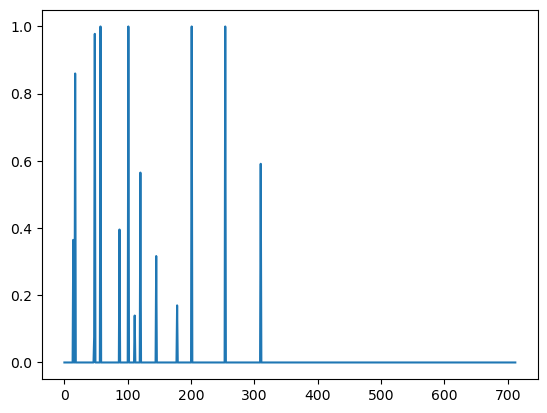

In [185]:
plt.plot(Ar_new[1])

In [366]:
Ar, Af = Ar_new, Af_new

In [367]:
import numpy as np

# Define a function to set elements close to zero to zero
def set_close_to_zero(arr, tol=1e-6):
    arr[np.abs(arr) < tol] = 0
    return arr

# Define a function to remove rows and columns that sum to zero
def remove_zero_rows_columns(arr):
    row_sum = np.sum(arr, axis=1)
    col_sum = np.sum(arr, axis=0)
    non_zero_rows = np.where(row_sum != 0)[0]
    non_zero_cols = np.where(col_sum != 0)[0]
    return arr[non_zero_rows][:, non_zero_cols], non_zero_rows, non_zero_cols

# Set elements close to zero to zero
Af = set_close_to_zero(Af)

# Remove rows and columns that sum to zero
Af, non_zero_rows_f, non_zero_cols_f = remove_zero_rows_columns(Af)


Ar = set_close_to_zero(Ar)

# Remove rows and columns that sum to zero
Ar, non_zero_rows_r, non_zero_cols_r = remove_zero_rows_columns(Ar)

print("Af after processing:")
print(Af)


Af after processing:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.15133351]]


In [368]:
# nonzero_columns_mask_f = np.any(Af != 0, axis=1)
# Af = Af[nonzero_columns_mask_f, :]

# nonzero_columns_mask_r = np.any(Ar != 0, axis=1)
# Ar = Ar[nonzero_columns_mask_r, :]

from numba import jit
@jit(nopython=True)
def get_beta_i_gamma_j(A):
#     A is an adjacency matrix 
    iters = 200
    beta, gamma, beta_new, gamma_new  = np.ones(np.shape(A)[0]), np.ones(np.shape(A)[1]), np.ones(np.shape(A)[0]), np.ones(np.shape(A)[1])
#     betatab, gammatab =  np.zeros((iters,np.shape(A)[0])), np.zeros((iters,np.shape(A)[1]))
    k_row, k_col = np.sum(A, axis=1), np.sum(A, axis=0) #degrees of the rows and columns of matrix A
    
    for iteration in range(iters):
        rij = np.zeros((len(beta), len(gamma)))
        for i in range(len(beta)):
            for j in range(len(gamma)):
                rij[i][j] = 1/(np.exp(-gamma[j]) + np.exp(beta[i]))
            beta_new[i] =  np.log(k_row[i])-np.log(np.sum(rij[i]))
        rij = np.zeros((len(gamma), len(beta)))
        for i in range(len(gamma)):
            for j in range(len(beta)):
                rij[i][j] = 1/(np.exp(-beta[j]) + np.exp(gamma[i]))
            gamma_new[i] =  np.log(k_col[i])-np.log(np.sum(rij[i]))
         
        beta, gamma = beta_new, gamma_new
#         print(beta[0], gamma[0])
#         betatab[i], gammatab[i] = beta_new, gamma_new
        
    
    pij = np.zeros(np.shape(A))
    for i in range(np.shape(A)[0]):
        for j in range(np.shape(A)[1]):
            pij[i][j] = 1/(1+np.exp(-(beta[i]+gamma[j])))
        
                                        
    return beta, gamma, pij
                                                    
beta_f, gamma_f, pij_f = get_beta_i_gamma_j(Af)
beta_r, gamma_r, pij_r = get_beta_i_gamma_j(Ar)



In [369]:
k_row, k_col = np.sum(Af, axis=1), np.sum(Af, axis=0)
k_row_ij, k_col_ij = np.sum(pij_f, axis=1), np.sum(pij_f, axis=0)
print(k_row[0:10])
print(k_row_ij[0:10])
print(k_col[0:10])
print(k_col_ij[0:10])

[3.5665516  3.66715477 5.90291245 5.6504634  6.07020766 3.4973829
 6.51528895 6.99930035 7.34581438 4.55564161]
[3.5665516  3.66715477 5.90291245 5.6504634  6.07020766 3.4973829
 6.51528895 6.99930035 7.34581438 4.55564161]
[2.14991194e+01 1.87824338e+01 1.70168357e+01 1.13253206e+01
 8.08585770e-01 3.06095217e+02 4.57027851e+01 3.09887042e+02
 4.03552750e+00 1.01303359e+03]
[2.14991194e+01 1.87824338e+01 1.70168357e+01 1.13253206e+01
 8.08585770e-01 3.06095217e+02 4.57027851e+01 3.09887042e+02
 4.03552750e+00 1.01303359e+03]


In [370]:
@jit(nopython=True)
def get_Aij_pij(Af, Ar, pij_f, pij_r):
    Aij_f = np.zeros((len(Af[0]), len(Af[0])))
    for i in range(len(Af[0])):
        for j in range(len(Af[0])):
            Aij_f[i][j] = Af[:,i]@Af[:,j]


    pij_pair_f = np.zeros((len(pij_f[0]), len(pij_f[0])))
    err_pij_pair_f = np.zeros((len(pij_f[0]), len(pij_f[0])))

    NNf = len(pij_f[:,0])
    Aij_f = Aij_f/NNf

    for i in range(len(pij_f[0])):
        for j in range(len(pij_f[0])):
            pij_pair_f[i][j] = pij_f[:,i]@pij_f[:,j]/NNf
            if pij_pair_f[i][j] > 0.:
    #             print(i,j)
                err_pij_pair_f[i][j] = np.sum(pij_f[:,i]**2.*pij_f[:,j]*(1-pij_f[:,j]) +\
                                              pij_f[:,j]**2.*pij_f[:,i]*(1-pij_f[:,i]))**.5/NNf
 

    Aij_r = np.zeros((len(Ar[0]), len(Ar[0])))
    for i in range(len(Ar[0])):
        for j in range(len(Ar[0])):
            Aij_r[i][j] = Ar[:,i]@Ar[:,j]


    pij_pair_r = np.zeros((len(pij_r[0]), len(pij_r[0])))
    err_pij_pair_r = np.zeros((len(pij_r[0]), len(pij_r[0])))

    NNr = len(pij_r[:,0])
    Aij_r = Aij_r/NNf

    for i in range(len(pij_r[0])):
        for j in range(len(pij_r[0])):
            pij_pair_r[i][j] = pij_r[:,i]@pij_r[:,j]/NNr
            if pij_pair_r[i][j] > 0.:
    #             print(i,j)
                err_pij_pair_r[i][j] = np.sum(pij_r[:,i]**2.*pij_r[:,j]*(1-pij_r[:,j]) +\
                                              pij_r[:,j]**2.*pij_r[:,i]*(1-pij_r[:,i]))**.5/NNr
        
        
    return Aij_f, Aij_r, pij_pair_f, pij_pair_r, err_pij_pair_f, err_pij_pair_r
    
Aij_f, Aij_r, pij_pair_f, pij_pair_r, err_pij_pair_f, err_pij_pair_r = get_Aij_pij(Af, Ar, pij_f, pij_r)
    
    

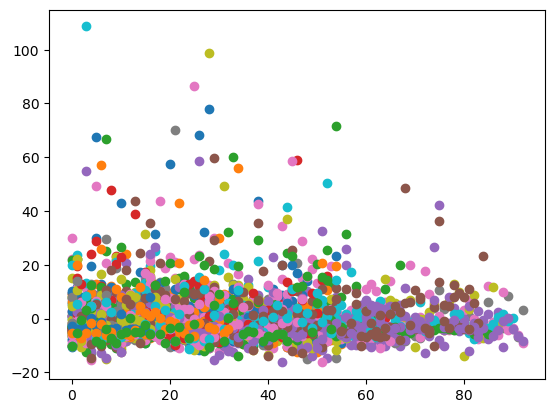

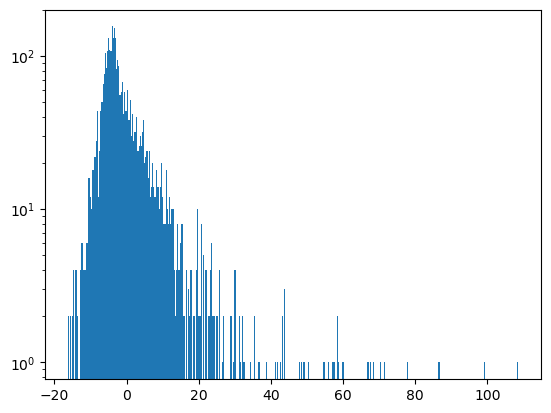

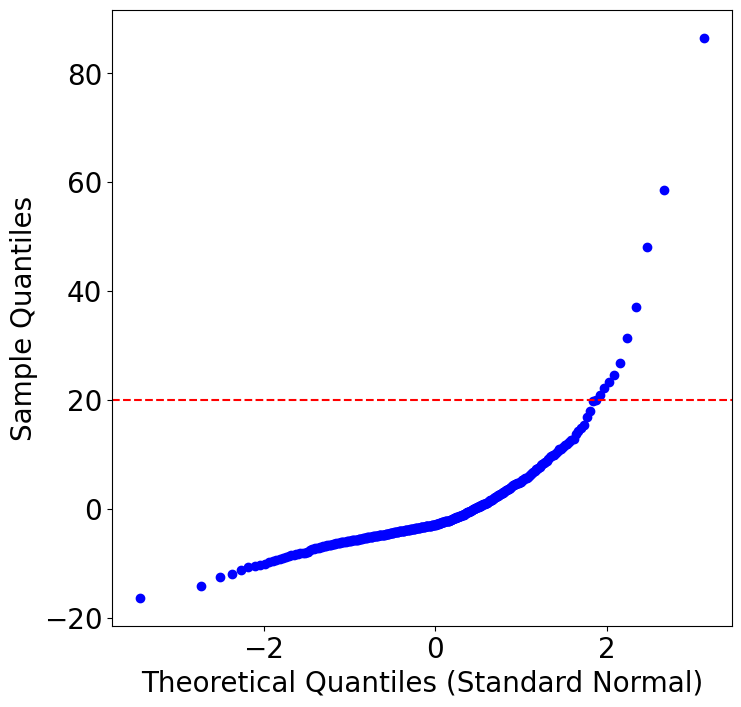

In [371]:
# forward
zitab_forward = np.zeros(np.shape(pij_pair_f))
for i in range(len(pij_pair_f)):
    for j in range(len(pij_pair_f[0])):
        if pij_pair_f[i][j]>0.001:
            if abs((Aij_f[i][j] - pij_pair_f[i][j])/err_pij_pair_f[i][j]) > 20:
                zitab_forward[i][j] = 1.
            
        
zvals = []       
for i in range(len(pij_pair_f)):

    ind = np.nonzero(pij_pair_f[i]>0.001)[0]
    if len(ind) > 0:
#     err_pij_pair[i][ind] = .0001
        plt.plot((Aij_f[i][ind] - pij_pair_f[i][ind])/err_pij_pair_f[i][ind], 'o')
        zvals.append((Aij_f[i][ind] - pij_pair_f[i][ind])/err_pij_pair_f[i][ind])

plt.show()

flat_zvals = []
for i in range(len(zvals)):
    for j in range(len(zvals[i])):
        flat_zvals.append(zvals[i][j])

plt.hist(flat_zvals, 400)
# plt.xscale('log')
plt.yscale('log')
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate a list of z-values (replace with your data)
# z_values = np.random.randn(100)  # Example: Random z-values for demonstration

# Sort the z-values
z_values_sorted = np.sort(flat_zvals)

# Calculate the expected quantiles for a standard normal distribution
n = len(z_values_sorted)
expected_quantiles = stats.norm.ppf(np.linspace(1/len(z_values_sorted), 1-1/len(z_values_sorted), len(z_values_sorted)))

# Create the Q-Q plot
plt.figure(figsize=(8, 8))
plt.scatter(expected_quantiles[::10], z_values_sorted[::10], c='b', marker='o', label='Observed')

# Set axis labels with fontsize 20
plt.xlabel('Theoretical Quantiles (Standard Normal)', fontsize=20)
plt.ylabel('Sample Quantiles', fontsize=20)

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=20)

# Add a horizontal line at y=50
plt.axhline(20, color='r', linestyle='--')

# Save the figure
plt.savefig('qqplot_aa_forward.pdf', bbox_inches='tight')

# Show the plot
plt.show()


NSD3 kd EDC4 kd

PAN3 kd TRIM71 kd

NR1I3 kd SUZ12 kd

GLIS3 kd STK11 kd

PAN3 kd CBFB kd

NSD3 kd GLIS3 kd

EDC4 kd MITF kd

GLIS3 kd MITF kd

EDC4 kd SMARCA4 kd

GLIS3 kd SMARCA4 kd

EED kd NR1I3 kd

ARID1A kd SLIRP kd

MITF kd ADAR oe

PAN3 kd ADAR oe

NSD3 kd PAN3 kd

TUT4 kd UNC5A kd

MAPK1 kd BCL11B kd

EED kd JUNB kd

ROR2 oe MAPK1 kd

NR1I3 kd EIF4A3 kd

ADAR oe TUT4 kd

PAN3 kd TUT4 kd

EDC4 kd CCND1 oe

GLIS3 kd SRRM4 oe

PAN3 kd SRRM4 oe

PAN3 kd CEBPA kd

GPD1 oe CEBPA kd

NR1I3 kd MED1 kd

TRIM71 kd FOXO1 kd

MAPK1 kd BMPR2 kd

JUNB kd RNF43 oe

TUT4 kd RNF43 oe

ADAR oe GPD1 oe

TUT4 kd GPD1 oe



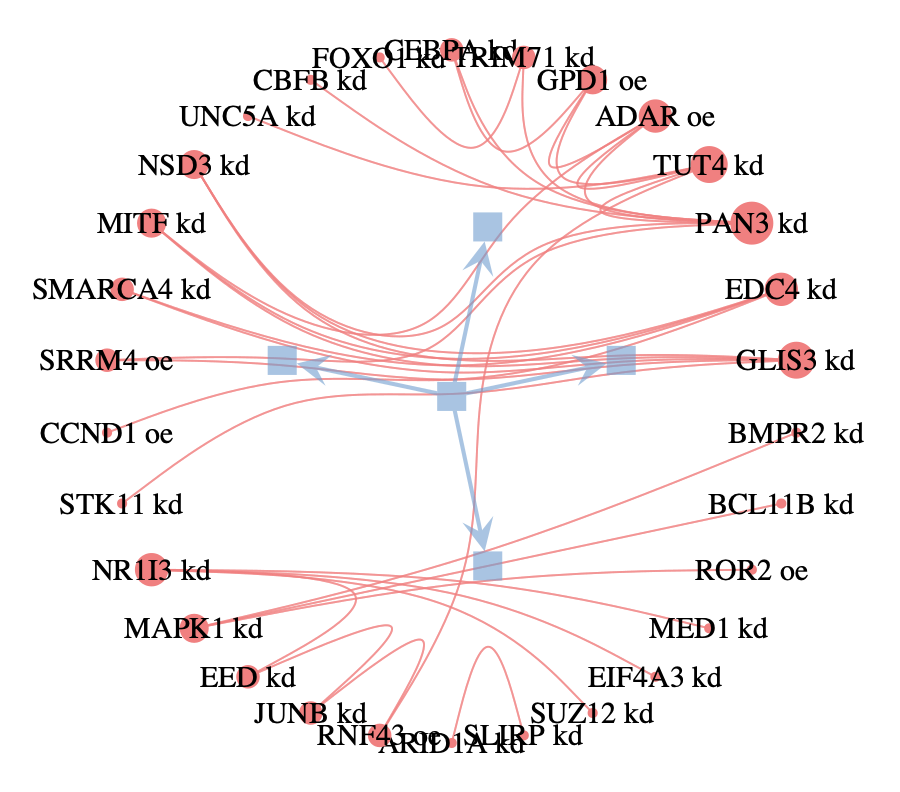

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x29b8940d0, at 0x16e149710>,
 <GraphView object, directed, with 35 vertices and 34 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x2eadb3710, at 0x16528d310>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x2eadb3710, at 0x16528e390>, False), at 0x2eadb3710>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x2eadb3710, at 0x29baefa10>)

In [373]:
# forward
import numpy as np

# Find pairs of nonzero indices
nonzero_pairs = np.transpose(np.nonzero(zitab_forward))
pairgenes_f = np.asarray(list(set(nonzero_pairs.flatten())))
# Create a mapping from original pair to renumbered pair
pair_mapping = {}
new_pair_id = 0

for pair in nonzero_pairs:
    pair = tuple(pair)
    if pair[0] != pair[1] and pair not in pair_mapping:
        if pair[0] not in pair_mapping:
            pair_mapping[pair[0]] = new_pair_id
            new_pair_id += 1
        if pair[1] not in pair_mapping:
            pair_mapping[pair[1]] = new_pair_id
            new_pair_id += 1

# Print the mapping of original pairs to renumbered pairs
# print("Pair Mapping:")
# for original_pair, renumbered_pair_id in pair_mapping.items():
#     print(f"{original_pair} -> {renumbered_pair_id}")

# Create a list of newly numbered pairs
newly_numbered_pairs = [(pair_mapping[pair[0]], pair_mapping[pair[1]]) for pair in nonzero_pairs if pair[0] != pair[1]]
reversed_pair_mapping = {v: k for k, v in pair_mapping.items()}
# Print the list of newly numbered pairs
# print("Newly Numbered Pairs:")
# for pair in newly_numbered_pairs:
#     print(pair)
    
import graph_tool.all as gt

# def create_graph_from_corr_matrix_gt(corr_matrix, centrality, weights, threshold=1.):
def create_graph_from_corr_matrix_gt(pairs):
    # Create an empty graph
    g = gt.Graph(directed=False)

    vertices = [g.add_vertex() for _ in range(1+max(np.array(pairs).flatten()))]
    gene_pairs_f = []
    gene_pairs_str_f = []
    for pair in pairs:
        
        i,j = pair
#         print(i,j)
        e = g.add_edge(vertices[i], vertices[j])
        if i > j:
#             str2 = Delta_gctx.row_metadata_df['fin_genotype'].iloc[non_zero_cols_f][reversed_pair_mapping[j]].split(';')[0][:6]
#             str1 = Delta_gctx.row_metadata_df['fin_genotype'].iloc[non_zero_cols_f][reversed_pair_mapping[i]].split(';')[0][:6]
            str1 = condensed_gene_perts[non_zero_cols_f][reversed_pair_mapping[j]]
            str2 = condensed_gene_perts[non_zero_cols_f][reversed_pair_mapping[i]]
            if str1[:5] == 'SRRM2':
                str1 = 'SRRM2'
            if str2[:5] == 'SRRM2':
                str2 = 'SRRM2'
            print(str1 +' '+ str2)
#             gene_pairs_r.append(str1 +' '+ str2)
            gene_pairs_f.append([i,j])
            gene_pairs_str_f.append([i,str1, j, str2])
#             print(Delta_gctx.row_metadata_df['fin_genotype'].iloc[nonzero_columns_mask][reversed_pair_mapping[i]].split(';')[0][:6],)
#             print(Delta_gctx.row_metadata_df['fin_genotype'].iloc[nonzero_columns_mask][reversed_pair_mapping[j]].split(';')[0][:6])
            print()
           

    return g, gene_pairs_f, gene_pairs_str_f



g, gene_pairs_f, gene_pairs_str_f = create_graph_from_corr_matrix_gt(np.array(newly_numbered_pairs))
v_labels = g.new_vertex_property("string")
count = 0
for v in g.vertices():
#     print('vertex v = ', v)
#     genestr = str(Delta_gctx.row_metadata_df['fin_genotype'].iloc[non_zero_cols_f][reversed_pair_mapping[count]].split(';')[0][:6])
    genestr = str(condensed_gene_perts[non_zero_cols_f][reversed_pair_mapping[count]])
    
    v_labels[v] = genestr
#     v_labels[v] =  str(count)
#     print(genestr)
    count += 1
g.vertex_properties["labels"] = v_labels


# Create a vertex property map to store the colors
vertex_colors = g.new_vertex_property("string")

# Set all vertices to have the same color (blue)
default_color = "lightcoral"
for v in g.vertices():
    vertex_colors[v] = default_color

# Set the vertex property map as the vertex color property
g.vertex_properties["color"] = vertex_colors



state = gt.minimize_nested_blockmodel_dl(g)
state.draw(output_size=(450, 450),
           vertex_fill_color=g.vertex_properties["color"], vertex_color="lightcoral" ,vertex_text=g.vertex_properties["labels"],vertex_text_color='black',vertex_font_size=15,vertex_text_position=-3)

state.draw(output_size=(450, 450),
           vertex_fill_color=g.vertex_properties["color"], vertex_color="lightcoral" ,vertex_text=g.vertex_properties["labels"],vertex_text_color='black',vertex_font_size=15,vertex_text_position=-3,output="reverse_net_ib.pdf")


# state.draw( output_size=(650, 650),vertex_text=g.vertex_properties["labels"],vertex_text_color='black',vertex_font_size=15,vertex_text_position=-3)
# state.draw( output_size=(450, 450),vertex_text=g.vertex_properties["labels"],vertex_text_color='black',vertex_font_size=15,vertex_text_position=-3, output="reverse_net_ib.pdf")




# finest_level = state.levels[0]
# community_assignments = finest_level.get_blocks()

# # Create a dictionary to store genes in each community
# community_genes = {}

# # Iterate through vertices and assign them to their communities
# for vertex in g.vertices():
#     community_id = community_assignments[vertex]
#     vertex_label = str(Delta_gctx.row_metadata_df['fin_genotype'].iloc[non_zero_cols_f][reversed_pair_mapping[vertex]].split(';')[0][:6])  # Get the gene label for the vertex
#     if community_id not in community_genes:
#         community_genes[community_id] = [vertex_label]
#     else:
#         community_genes[community_id].append(vertex_label)

# # Print the communities and their genes
# for community_id, genes in community_genes.items():
#     print(f"Community {int(community_id)}:")
#     for gene in genes:
#         print(gene)

        


        

    

In [372]:
condensed_gene_perts=np.array(condensed_gene_perts)
condensed_gene_perts[non_zero_cols_f]

array(['NSD3 kd', 'WTAP kd', 'MYCN kd', 'TP63 kd', 'PROX1 oe', 'PROX1 kd',
       'RNF40 kd', 'EDC4 kd', 'IKBKB kd', 'ARID1A kd', 'EZH2 kd',
       'EZH2 oe', 'TRIM71 kd', 'STAU1 oe', 'TFEB kd', 'ERG oe',
       'METTL3 kd', 'POU5F1 oe', 'METTL14 kd', 'VIRMA kd', 'ADAR kd',
       'BEGAIN kd', 'CCNK kd', 'DPPA5 kd', 'GLI1 kd', 'JAK2 kd',
       'POLR2D kd', 'PSMD13 kd', 'TGM5 kd', 'TOX4 kd', 'CDX2 oe',
       'CEBPA oe', 'EGR1 oe', 'ETV2 oe', 'FLI1 oe', 'FOXC2 oe',
       'FOXF1 oe', 'GATA1 oe', 'GATA2 oe', 'GATA3 oe', 'HHEX oe',
       'LMO2 oe', 'LYL1 oe', 'NFE2 oe', 'SPI1 oe', 'EED kd', 'EZH1 kd',
       'SUZ12 kd', 'STK11 kd', 'DKC1 kd', 'AFF4 kd', 'CBFB kd', 'ERG kd',
       'GLIS3 kd', 'HNRNPF kd', 'RBPJ kd', 'TCF3 kd', 'MITF kd',
       'SMARCA4 kd', 'RELA oe', 'U2AF1 oe', 'SLC9A3R2 kd', 'ABL1 kd',
       'ABL2 kd', 'NR1I3 kd', 'ROR2 oe', 'MIR1343 oe', 'FUS kd',
       'SLIRP kd', 'MIR126 kd', 'COP1 kd', 'MIR29A kd', 'ADARB1 kd',
       'ADAR oe', 'ADARB1 oe', 'PAN3 kd', 'AIMP2 

In [55]:
genes_by_number[0]

'CEBPA'

In [282]:
condensed_gene_perts

array(['RPAP3 kd', 'HSPA5 kd', 'NSD3 kd', 'WTAP kd', 'SLC25A25 kd',
       'BMI1 oe', 'DDX3X kd', 'DDX54 kd', 'TBX2 kd', 'MYCN kd',
       'RNPS1 kd', 'RNPS1 oe', 'TP63 kd', 'PROX1 oe', 'PROX1 kd',
       'RNF40 kd', 'EDC4 kd', 'IKBKB kd', 'ARID1A kd', 'PAX8 kd',
       'HDAC5 oe', 'NR1D1 kd', 'SON kd', 'APOBEC3F oe', 'APOBEC3G oe',
       'MYCN oe', 'NEAT1 kd', 'EZH2 kd', 'EZH2 oe', 'C9orf72 mu',
       'C9orf72 kd', 'INS mu', 'TRIM71 kd', 'STAU1 kd', 'STAU1 oe',
       'TFEB kd', 'ERG oe', 'METTL3 kd', 'POU5F1 oe', 'METTL14 kd',
       'VIRMA kd', 'ADAR kd', 'BEGAIN kd', 'CCNK kd', 'CDK10 kd',
       'DPPA5 kd', 'EIF3L kd', 'GLI1 kd', 'JAK2 kd', 'NFYA kd',
       'POLR2D kd', 'PSMD13 kd', 'RGS18 kd', 'SAP130 kd', 'TGM5 kd',
       'TOX4 kd', 'CBFB oe', 'CDX2 oe', 'CEBPA oe', 'EGR1 oe', 'ETV2 oe',
       'ETV6 oe', 'FLI1 oe', 'FOXC2 oe', 'FOXF1 oe', 'GATA1 oe',
       'GATA2 oe', 'GATA3 oe', 'GFI1 oe', 'HAND1 oe', 'HES1 oe',
       'HHEX oe', 'LMO2 oe', 'LYL1 oe', 'MYB oe', 'NAB2 oe',

In [374]:
print(pairgenes_f)
pairgenes_f = []
for i in range(len(nonzero_pairs)):
    gene1, gene2 = nonzero_pairs[i]
    if gene1 != gene2:
        pairgenes_f.append(gene1)
        pairgenes_f.append(gene2)

pairgenes_f = np.asarray(list(set(pairgenes_f)))
print(pairgenes_f)

[  0 128 131   5 134   7   9 139  12  13  14 143  16  17  20  29  45  47
  48  51  53  57  58  60  64  65  68  69  70  73  75  77  81  82  84  88
  89  91  93  95  97 102 104 111 112 114 121 127]
[  0 134   7   9 139  12 143  45  47  48  51  53  57  58  64  65  68  73
  75  81  82  88  89  93  95 102 111 114 121 127]


In [375]:
pert_column_ids = Delta_gctx.data_df.columns
# unique_gene_perts = np.asarray(list(set(gene_perts)))
unique_gene_perts = condensed_gene_perts

input_genes = unique_gene_perts.copy()
for i in range(len(input_genes)):
    input_genes[i] = input_genes[i][:-3]

perts_to_eid = {
    gene: item['element']
    for gene in input_genes
    for item in gene_dict
    if gene in item['last_two_words']
#     if gene in item['last_two_words'].split(',')
}
pert_to_gene_indices = {gene: pert_column_ids.get_loc(eid) for gene, eid in perts_to_eid.items() if eid in pert_column_ids}

    
common_top_genes_f_and_r = condensed_gene_perts[non_zero_cols_f][pairgenes_f] 
for i in range(len(common_top_genes_f_and_r)):
    common_top_genes_f_and_r[i] = common_top_genes_f_and_r[i][:-3]
# Assuming common_top_genes_f_and_r is a list of genes and pert_to_gene_indices is the dictionary mapping genes to indices

# List to store corresponding gene indices
common_top_gene_indices_f_and_r, common_top_pert_indices_f_and_r = [], []
count  = 0
finalgenes = []
# Iterate over each gene in common_top_genes_f_and_r
for gene in common_top_genes_f_and_r:
    # Check if the gene exists in pert_to_gene_indices
    if gene in pert_to_gene_indices:
        # Append the corresponding index to the list
        finalgenes.append(gene)
        common_top_gene_indices_f_and_r.append(pert_to_gene_indices[gene])
        common_top_pert_indices_f_and_r.append(pairgenes_f[count])
    else: print(gene)
    count += 1

# Print the list of gene indices
print("Corresponding gene indices:", common_top_gene_indices_f_and_r)
print("Corresponding pert indices:", common_top_pert_indices_f_and_r)

MITF
SMARCA4
UNC5A
SRRM4
Corresponding gene indices: [29775, 35381, 39659, 4429, 48649, 45401, 50668, 31161, 14890, 23799, 45, 3892, 28736, 2141, 11059, 49119, 47541, 32156, 9147, 29914, 16228, 32088, 35387, 31338, 50637, 37096]
Corresponding pert indices: [0, 134, 7, 9, 139, 12, 143, 45, 47, 48, 51, 53, 64, 65, 68, 73, 75, 82, 88, 89, 93, 95, 102, 114, 121, 127]


In [376]:
# Example lists for demonstration

# Create the finalgenes_ann list
finalgenes_ann = []

# Populate finalgenes_ann with corresponding annotations from condensed_gene_perts
for gene in finalgenes:
    for annotated_gene in condensed_gene_perts:
        if gene in annotated_gene:
            finalgenes_ann.append(annotated_gene)
            break

# Print the finalgenes_ann list
print("\nFinalgenes_ann list with annotations:")
print(finalgenes_ann)



Finalgenes_ann list with annotations:
['NSD3 kd', 'BMPR2 oe', 'EDC4 kd', 'ARID1A kd', 'RNF43 oe', 'TRIM71 kd', 'GPD1 oe', 'EED kd', 'SUZ12 kd', 'STK11 kd', 'CBFB oe', 'GLIS3 kd', 'NR1I3 kd', 'ROR2 oe', 'SLIRP kd', 'ADAR kd', 'PAN3 kd', 'BCL11B kd', 'JUNB kd', 'MAPK1 kd', 'EIF4A3 kd', 'TUT4 kd', 'CCND1 oe', 'CEBPA oe', 'MED1 kd', 'FOXO1 kd']


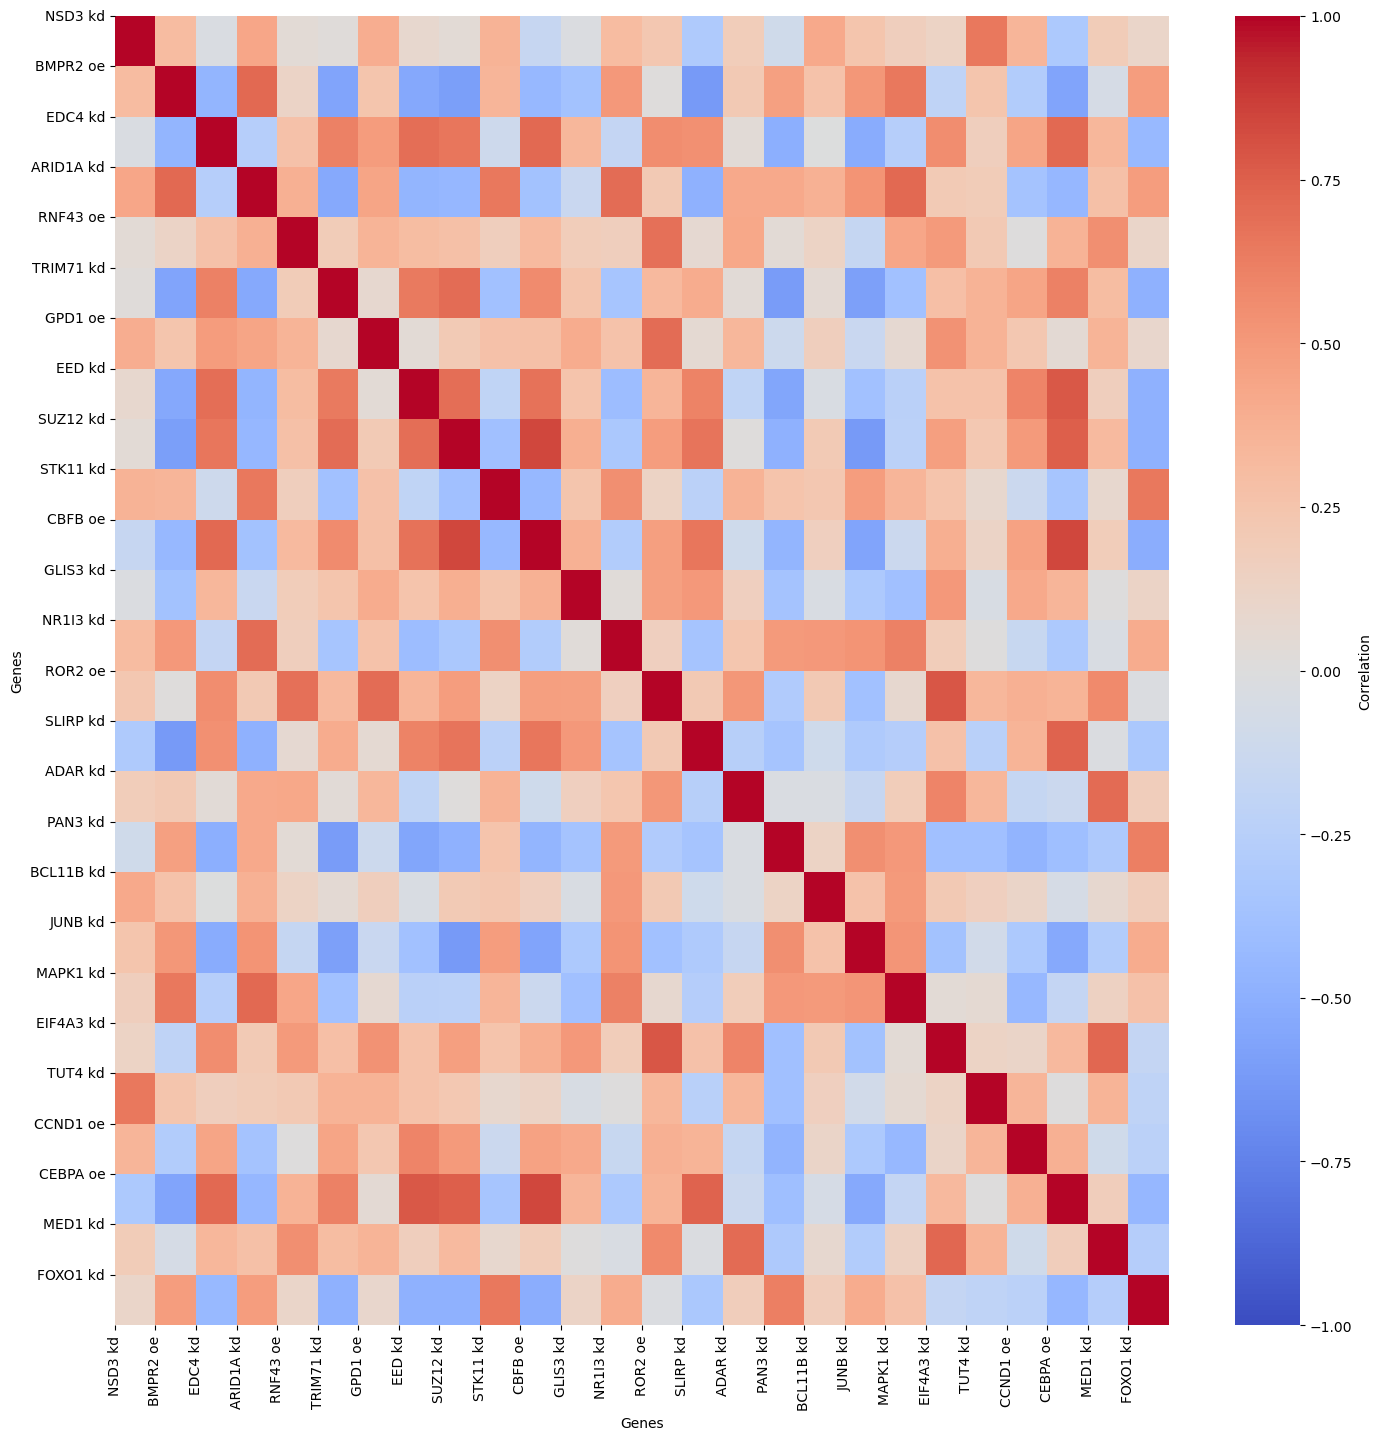

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'gene_labels' is a list of gene labels corresponding to 'common_top_gene_indices_f_and_r'
gene_labels = finalgenes_ann  # replace with actual gene labels

A = Delta_gctx.data_df.to_numpy()
A = A[non_zero_cols_f]
A = A_new
Acorr = np.corrcoef(A[common_top_pert_indices_f_and_r][:, common_top_gene_indices_f_and_r], rowvar=False)

fig, axs = plt.subplots(1, 1, figsize=(17, 17))

sns.heatmap(Acorr, cmap='coolwarm', ax=axs, cbar_kws={'label': 'Correlation'},vmin=-1, vmax=1)
axs.set_xlabel('Genes')
axs.set_ylabel('Genes')
# axs.set_zlim(-1, 1)

# Add gene labels after plotting the heatmap
axs.set_xticks(range(len(gene_labels)))
axs.set_yticks(range(len(gene_labels)))
axs.set_xticklabels(gene_labels, rotation=90, ha="center")
axs.set_yticklabels(gene_labels, rotation=0, va="center")

plt.show()

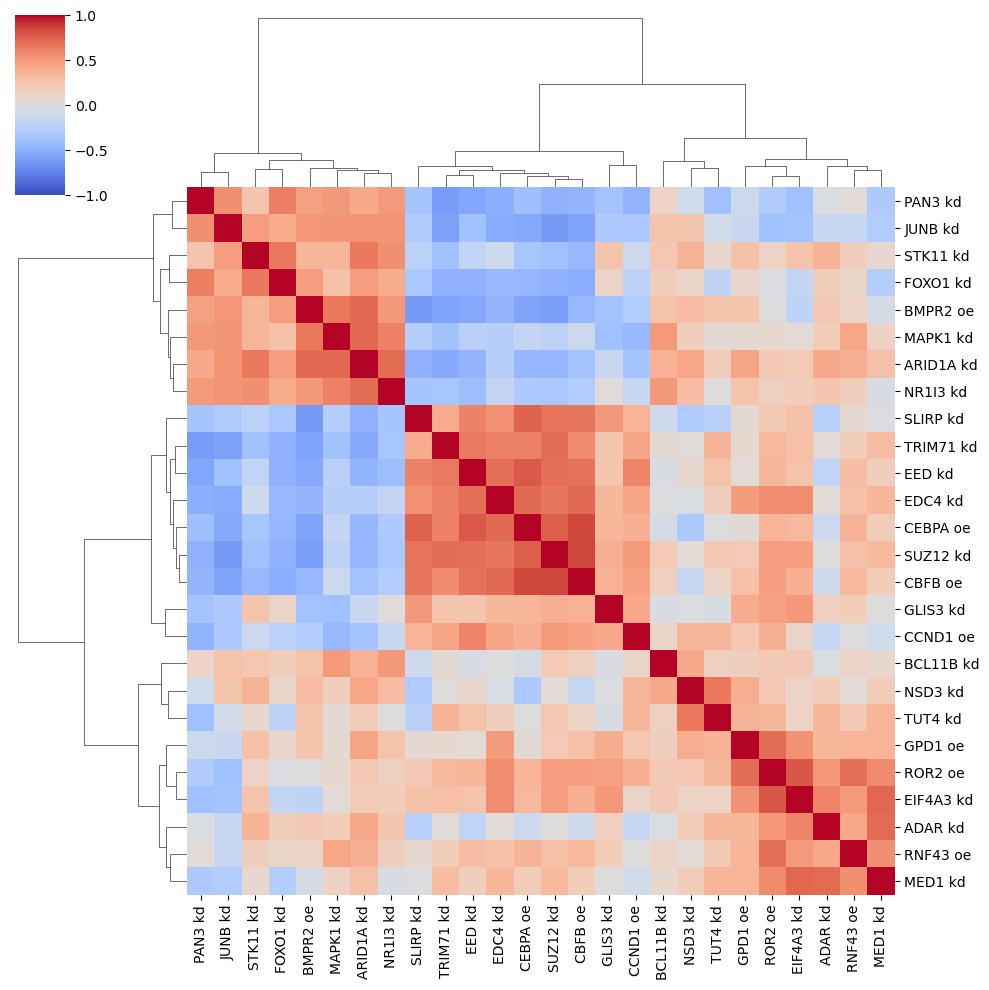

In [378]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage

# Your correlation matrix and a list of labels corresponding to the indices

# Creating the linkage matrix for clustering
row_linkage = linkage(Acorr, method='ward')
col_linkage = linkage(Acorr.T, method='ward')  # Transpose for column clustering

# Creating a clustermap with labels
sns.clustermap(Acorr, cmap='coolwarm', figsize=(10, 10),
               row_cluster=True, col_cluster=True,
               row_linkage=row_linkage, col_linkage=col_linkage,
               xticklabels=gene_labels, yticklabels=gene_labels,vmin=-1, vmax=1)
plt.show()


In [379]:
print(pairgenes_f)
pairgenes_f = []
for i in range(len(nonzero_pairs)):
    gene1, gene2 = nonzero_pairs[i]
    if gene1 != gene2:
        pairgenes_f.append(gene1)
        pairgenes_f.append(gene2)

pairgenes_f = np.asarray(list(set(pairgenes_f)))
print(pairgenes_f)

gene_pair_index_f = []
for pair in gene_pairs_f:
    i,j = pair
    gene_pair_index_f.append([reversed_pair_mapping[i], reversed_pair_mapping[j]])
print(gene_pair_index_f)

[  0 134   7   9 139  12 143  45  47  48  51  53  57  58  64  65  68  73
  75  81  82  88  89  93  95 102 111 114 121 127]
[  0 134   7   9 139  12 143  45  47  48  51  53  57  58  64  65  68  73
  75  81  82  88  89  93  95 102 111 114 121 127]
[[7, 0], [12, 75], [47, 64], [48, 53], [51, 75], [53, 0], [57, 7], [57, 53], [58, 7], [58, 53], [64, 45], [68, 9], [73, 57], [73, 75], [75, 0], [81, 95], [82, 89], [88, 45], [89, 65], [93, 64], [95, 73], [95, 75], [102, 7], [111, 53], [111, 75], [114, 75], [114, 143], [121, 64], [127, 12], [134, 89], [139, 88], [139, 95], [143, 73], [143, 95]]


In [380]:
pert_column_ids = Delta_gctx.data_df.columns
unique_gene_perts = np.asarray(list(set(gene_perts)))

# input_genes = unique_gene_perts
input_genes = condensed_gene_perts.copy()
for i in range(len(input_genes)):
    input_genes[i] = input_genes[i][:-3]

perts_to_eid = {
    gene: item['element']
    for gene in input_genes
    for item in gene_dict
    if gene in item['last_two_words']
#     if gene in item['last_two_words'].split(',')
}
pert_to_gene_indices = {gene: pert_column_ids.get_loc(eid) for gene, eid in perts_to_eid.items() if eid in pert_column_ids}

    
common_top_genes_f_and_r = condensed_gene_perts[non_zero_cols_f][pairgenes_f]
for i in range(len(common_top_genes_f_and_r)):
    common_top_genes_f_and_r[i] = common_top_genes_f_and_r[i][:-3]
# Assuming common_top_genes_f_and_r is a list of genes and pert_to_gene_indices is the dictionary mapping genes to indices

# List to store corresponding gene indices
common_top_gene_indices_f_and_r, common_top_pert_indices_f_and_r = [], []
count  = 0
finalgenes, finalgeneindex = [], []
# Iterate over each gene in common_top_genes_f_and_r
for gene in common_top_genes_f_and_r:
    # Check if the gene exists in pert_to_gene_indices
    if gene in pert_to_gene_indices:
        # Append the corresponding index to the list
        finalgenes.append(gene)
        finalgeneindex.append(pairgenes_f[count])
        common_top_gene_indices_f_and_r.append(pert_to_gene_indices[gene])
        common_top_pert_indices_f_and_r.append(pairgenes_f[count])
    else: print(gene)
    count += 1

# Print the list of gene indices
print("Corresponding gene indices:", common_top_gene_indices_f_and_r)
print("Corresponding pert indices:", common_top_pert_indices_f_and_r)

indtoind  = {finalgeneindex[i]: i for i in range(len(finalgeneindex))}

count = 0
newpairs = []
for pair in gene_pair_index_f:
    i,j = pair
    if i in finalgeneindex and j in finalgeneindex:
        newind1, newind2 = indtoind[i], indtoind[j]
#         print(Acorr[ind1,ind2])
        newpairs.append([newind1, newind2])
        count += 1
    else: print(i,j)


MITF
SMARCA4
UNC5A
SRRM4
Corresponding gene indices: [29775, 35381, 39659, 4429, 48649, 45401, 50668, 31161, 14890, 23799, 45, 3892, 28736, 2141, 11059, 49119, 47541, 32156, 9147, 29914, 16228, 32088, 35387, 31338, 50637, 37096]
Corresponding pert indices: [0, 134, 7, 9, 139, 12, 143, 45, 47, 48, 51, 53, 64, 65, 68, 73, 75, 82, 88, 89, 93, 95, 102, 114, 121, 127]
57 7
57 53
58 7
58 53
73 57
81 95
111 53
111 75


In [129]:
len(pert_column_ids)

50691

1 EDC4 NSD3
2 TRIM71 PAN3
3 SUZ12 NR1I3
4 STK11 GLIS3
5 CBFB PAN3
6 GLIS3 NSD3
7 NR1I3 EED
8 SLIRP ARID1A
9 ADAR PAN3
10 PAN3 NSD3
11 BCL11B MAPK1
12 JUNB EED
13 MAPK1 ROR2
14 EIF4A3 NR1I3
15 TUT4 ADAR
16 TUT4 PAN3
17 CCND1 EDC4
18 CEBPA PAN3
19 CEBPA GPD1
20 MED1 NR1I3
21 FOXO1 TRIM71
22 BMPR2 MAPK1
23 RNF43 JUNB
24 RNF43 TUT4
25 GPD1 ADAR
26 GPD1 TUT4


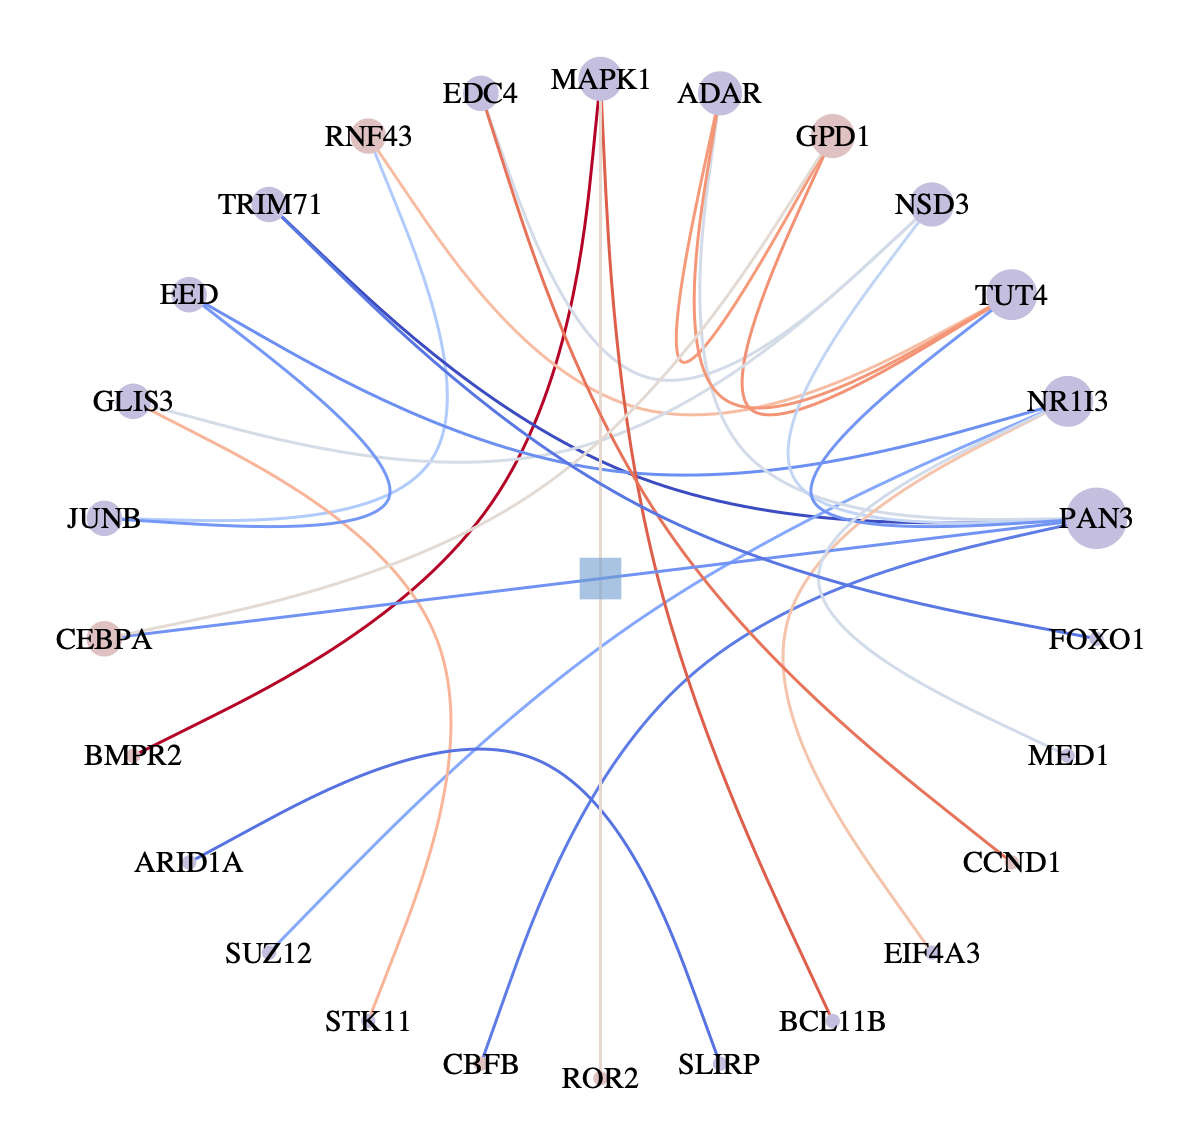

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1682f40d0, at 0x2fdaf8990>,
 <GraphView object, directed, with 27 vertices and 26 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x29b8c3350, at 0x16b3262d0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x29b8c3350, at 0x16b319b10>, False), at 0x29b8c3350>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x29b8c3350, at 0x2cc7f1dd0>)

In [381]:
# reverse
import numpy as np


import matplotlib
    
import graph_tool.all as gt

# # Find pairs of nonzero indices
# nonzero_pairs = newpairs
# # Create a mapping from original pair to renumbered pair
# pair_mapping = {}
# new_pair_id = 0

# for pair in nonzero_pairs:
#     pair = tuple(pair)
#     if pair[0] != pair[1] and pair not in pair_mapping:
#         if pair[0] not in pair_mapping:
#             pair_mapping[pair[0]] = new_pair_id
#             new_pair_id += 1
#         if pair[1] not in pair_mapping:
#             pair_mapping[pair[1]] = new_pair_id
#             new_pair_id += 1

# newly_numbered_pairs = [(pair_mapping[pair[0]], pair_mapping[pair[1]]) for pair in nonzero_pairs if pair[0] != pair[1]]
# reversed_pair_mapping = {v: k for k, v in pair_mapping.items()}

# def create_graph_from_corr_matrix_gt(corr_matrix, centrality, weights, threshold=1.):
def create_graph_from_corr_matrix_gt(pairs, newfingenes):
    # Create an empty graph
    g = gt.Graph(directed=False)
#     vertices = [g.add_vertex() for _ in range(1+max(np.array(pairs).flatten()))]
    vertices = [g.add_vertex() for _ in range(len(newfingenes))]
    
    gene_pairs_r = []
    
    weights = g.new_edge_property("double")
    count = 0
#     print(pairs)
    gene_pairs_f = []
    for pair in pairs:
        i,j = pair
        e = g.add_edge(vertices[i], vertices[j])
        weights[e] = Acorr[i][j]
        count += 1
        print(count, finalgenes[i] +' '+ finalgenes[j])
        gene_pairs_f.append(finalgenes[i] +' '+ finalgenes[j])

        
        
    g.edge_properties["weight"] = weights
    
     
    
    return g, weights, gene_pairs_f




g, weights,gene_pairs_f_final = create_graph_from_corr_matrix_gt(np.array(newpairs), finalgenes)
v_labels = g.new_vertex_property("string")
count = 0
for v in g.vertices():
#     print('vertex v = ', v)
    genestr = finalgenes[count]
    v_labels[v] = genestr

    count += 1
g.vertex_properties["labels"] = v_labels

# Create a vertex property map to store the colors
vertex_colors = g.new_vertex_property("string")

# Set all vertices to have the same color (blue)
# oe_color = "lightcoral"
# kd_color = "lightsteelblue"
import matplotlib.colors as mcolors
import colorsys
oe_color = "indianred"
kd_color = "slateblue"
# Function to adjust hue to pastel
def make_pastel(color):
    rgb = mcolors.to_rgb(color)
    h, l, s = colorsys.rgb_to_hls(*rgb)
    s *= 0.6  # Reduce saturation
    l *= 1.4  # Increase lightness
    l = min(l, 1.0)  # Ensure lightness does not exceed 1.0
    pastel_rgb = colorsys.hls_to_rgb(h, l, s)
    return pastel_rgb

# Adjust colors to pastel
oe_color_pastel = make_pastel(oe_color)
kd_color_pastel = make_pastel(kd_color)

# Apply colors to vertices
vertex_colors = g.new_vertex_property("vector<float>")
count = 0
for v in g.vertices():
    if finalgenes_ann[count][-2:] == 'kd':
        vertex_colors[v] = kd_color_pastel
    else:
        vertex_colors[v] = oe_color_pastel
    count += 1

# Set the vertex property map as the vertex color property
g.vertex_properties["color"] = vertex_colors


state = gt.minimize_nested_blockmodel_dl(g,
                                         state_args=dict(base_type=gt.LayeredBlockState,
                                                         state_args=dict(ec=weights, layers=False)))

# state = gt.minimize_nested_blockmodel_dl(g)

state.draw(edge_color=g.ep.weight, edge_gradient=[],
           ecmap=(matplotlib.cm.coolwarm, 1.), edge_pen_width=1.5,
           output_size=(600, 600),vertex_fill_color=g.vertex_properties["color"], vertex_color=g.vertex_properties["color"] ,\
           vertex_text=g.vertex_properties["labels"],\
           vertex_text_color='black',vertex_font_size=15,vertex_text_position=-3)

state.draw(edge_color=g.ep.weight, edge_gradient=[],
           ecmap=(matplotlib.cm.coolwarm, 1.), edge_pen_width=1.5,
           output_size=(500, 500),vertex_fill_color=g.vertex_properties["color"], vertex_color=g.vertex_properties["color"] ,\
           vertex_text=g.vertex_properties["labels"],\
           vertex_text_color='black',vertex_font_size=15,vertex_text_position=-3, output="forward_net_ib.pdf")

        

    

/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_96189/307326568.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm, orientation='horizontal', ticks=[-1, 0, 1])


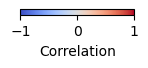

In [330]:
import matplotlib.pyplot as plt
import numpy as np

# Create a dummy scalar mappable object with the desired colormap and range
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=-1, vmax=1))

# Remove the array from the scalar mappable object to avoid warnings
sm.set_array([])

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# Add the colorbar
cbar = fig.colorbar(sm, orientation='horizontal', ticks=[-1, 0, 1])

# Set the colorbar label
cbar.set_label('Correlation')

# Remove the axis and outline
ax.remove()

# Save the colorbar only as an image file
fig.savefig('colorbar.pdf', bbox_inches='tight', pad_inches=0)

plt.show()

# Close the figure to avoid displaying it
plt.close(fig)





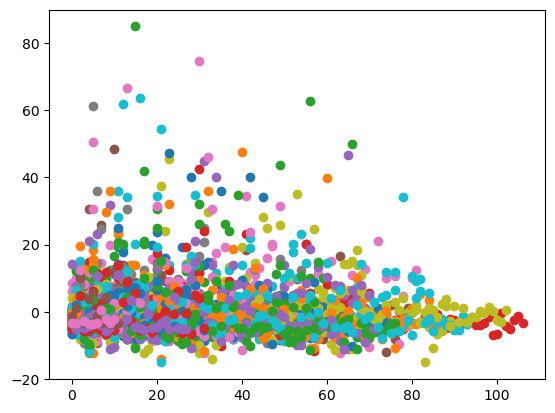

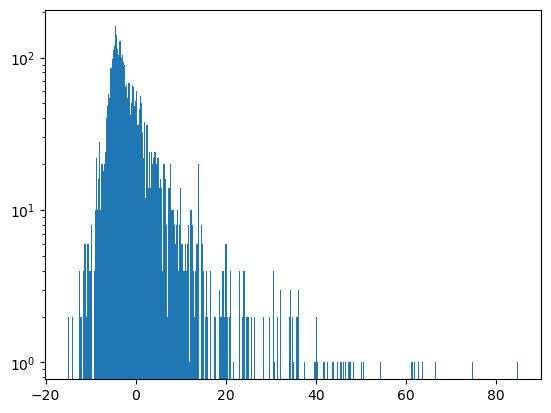

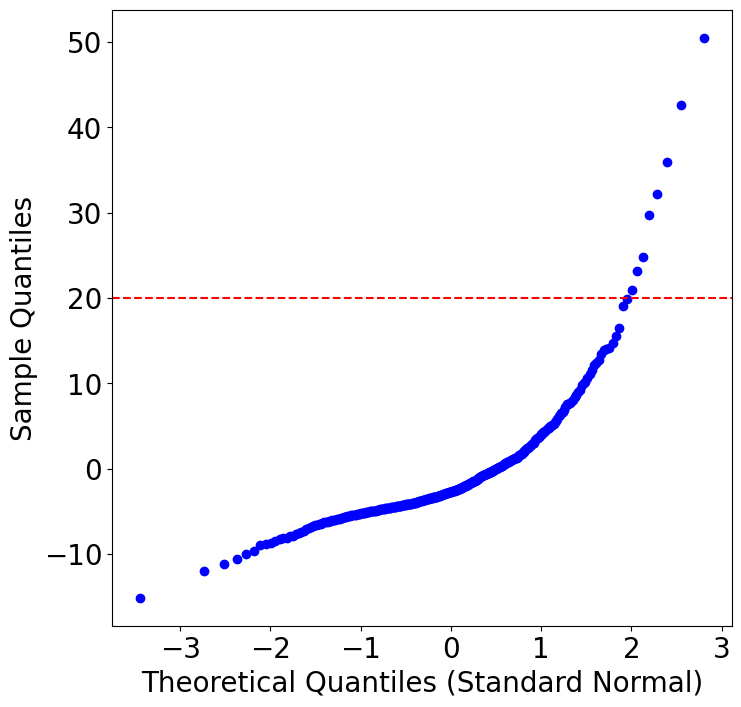

In [382]:
# reverse
zitab_reverse = np.zeros(np.shape(pij_pair_r))
for i in range(len(pij_pair_r)):
    for j in range(len(pij_pair_r[0])):
        if pij_pair_r[i][j]>0.001:
            if abs((Aij_r[i][j] - pij_pair_r[i][j])/err_pij_pair_r[i][j]) > 20:
                zitab_reverse[i][j] = 1.
            
        
zvals = []       
for i in range(len(pij_pair_r)):

    ind = np.nonzero(pij_pair_r[i]>0.001)[0]
    if len(ind) > 0:
#     err_pij_pair[i][ind] = .0001
        plt.plot((Aij_r[i][ind] - pij_pair_r[i][ind])/err_pij_pair_r[i][ind], 'o')
        zvals.append((Aij_r[i][ind] - pij_pair_r[i][ind])/err_pij_pair_r[i][ind])

plt.show()

flat_zvals = []
for i in range(len(zvals)):
    for j in range(len(zvals[i])):
        flat_zvals.append(zvals[i][j])

plt.hist(flat_zvals, 400)
# plt.xscale('log')
plt.yscale('log')
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate a list of z-values (replace with your data)
# z_values = np.random.randn(100)  # Example: Random z-values for demonstration

# Sort the z-values
z_values_sorted = np.sort(flat_zvals)

# Calculate the expected quantiles for a standard normal distribution
n = len(z_values_sorted)
expected_quantiles = stats.norm.ppf(np.linspace(1/len(z_values_sorted), 1-1/len(z_values_sorted), len(z_values_sorted)))

# Create the Q-Q plot
plt.figure(figsize=(8, 8))
plt.scatter(expected_quantiles[::10], z_values_sorted[::10], c='b', marker='o', label='Observed')

# Set axis labels with fontsize 20
plt.xlabel('Theoretical Quantiles (Standard Normal)', fontsize=20)
plt.ylabel('Sample Quantiles', fontsize=20)

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=20)

# Add a horizontal line at y=50
plt.axhline(20, color='r', linestyle='--')

# Save the figure
plt.savefig('qqplot_aa_reverse.pdf', bbox_inches='tight')

# Show the plot
plt.show()


DPPA5 kd JAK2 kd

IKBKB kd CDX2 oe

SART3 kd EED kd

EED kd SUZ12 kd

CCND1 oe GLIS3 kd

PAN3 kd MITF kd

CCND1 oe MITF kd

TCF3 kd SMARCA4 kd

SUZ12 kd NR1I3 kd

SART3 kd NR1I3 kd

CCND1 oe COP1 kd

GLIS3 kd PAN3 kd

COP1 kd RNF20 kd

SART3 kd RNF20 kd

SART3 kd UNC5A kd

SUZ12 kd JUNB kd

SART3 kd JUNB kd

SUZ12 kd MAPK1 kd

SUZ12 kd EIF4A3 kd

ADAR kd CCND1 oe

COP1 kd MYC oe

SUZ12 kd TENT4B oe

CDX2 oe ALDH1A1 kd

EDC4 kd RPS6KB2 kd

COP1 kd FOXO1 kd

DPPA5 kd SART3 kd

JAK2 kd SART3 kd

JAK2 kd BPIFB3 kd



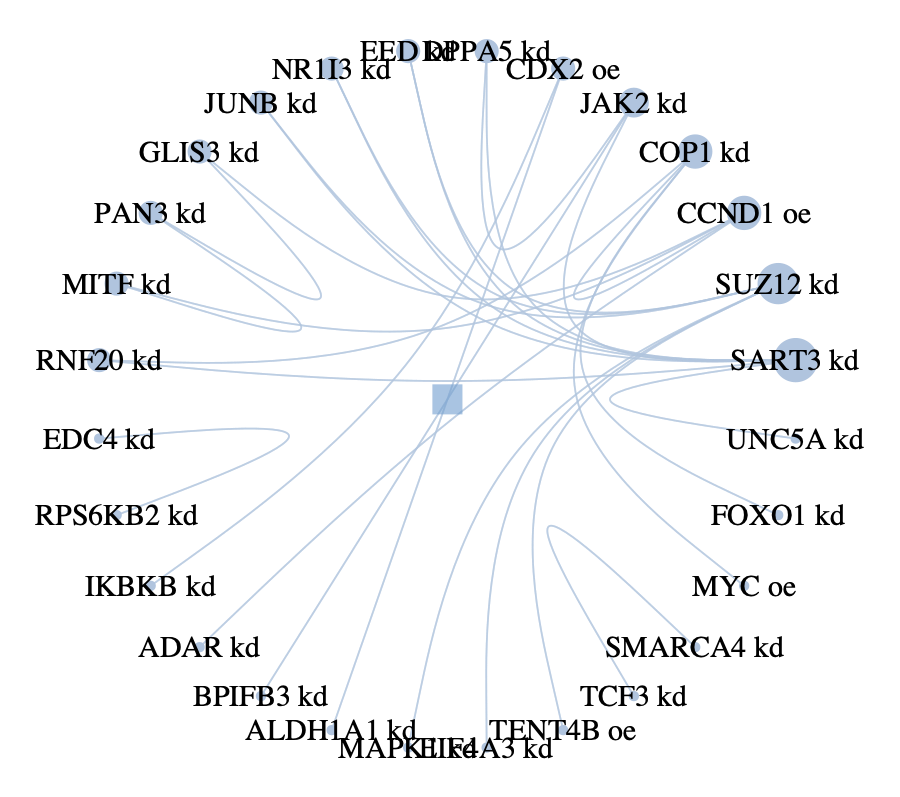

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x29a1f2c10, at 0x29a6028d0>,
 <GraphView object, directed, with 29 vertices and 28 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x2e0f89510, at 0x29b573ed0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x2e0f89510, at 0x2cc7838d0>, False), at 0x2e0f89510>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x2e0f89510, at 0x2cc783e50>)

In [383]:
# reverse
import numpy as np

# Find pairs of nonzero indices
nonzero_pairs = np.transpose(np.nonzero(zitab_reverse))
pairgenes_r = np.asarray(list(set(nonzero_pairs.flatten())))

# Create a mapping from original pair to renumbered pair
pair_mapping = {}
new_pair_id = 0

for pair in nonzero_pairs:
    pair = tuple(pair)
    if pair[0] != pair[1] and pair not in pair_mapping:
        if pair[0] not in pair_mapping:
            pair_mapping[pair[0]] = new_pair_id
            new_pair_id += 1
        if pair[1] not in pair_mapping:
            pair_mapping[pair[1]] = new_pair_id
            new_pair_id += 1

# Print the mapping of original pairs to renumbered pairs
# print("Pair Mapping:")
# for original_pair, renumbered_pair_id in pair_mapping.items():
#     print(f"{original_pair} -> {renumbered_pair_id}")

# Create a list of newly numbered pairs
newly_numbered_pairs = [(pair_mapping[pair[0]], pair_mapping[pair[1]]) for pair in nonzero_pairs if pair[0] != pair[1]]
reversed_pair_mapping = {v: k for k, v in pair_mapping.items()}
# Print the list of newly numbered pairs
# print("Newly Numbered Pairs:")
# for pair in newly_numbered_pairs:
#     print(pair)
    
import graph_tool.all as gt

# def create_graph_from_corr_matrix_gt(corr_matrix, centrality, weights, threshold=1.):
def create_graph_from_corr_matrix_gt(pairs):
    # Create an empty graph
    g = gt.Graph(directed=False)

    vertices = [g.add_vertex() for _ in range(1+max(np.array(pairs).flatten()))]
    gene_pairs_r = []
    for pair in pairs:
        
        i,j = pair
#         print(i,j)
        e = g.add_edge(vertices[i], vertices[j])
        if i > j:
#             str2 = Delta_gctx.row_metadata_df['fin_genotype'].iloc[non_zero_cols_r][reversed_pair_mapping[j]].split(';')[0][:6]
#             str1 = Delta_gctx.row_metadata_df['fin_genotype'].iloc[non_zero_cols_r][reversed_pair_mapping[i]].split(';')[0][:6]
            str1 = condensed_gene_perts[non_zero_cols_r][reversed_pair_mapping[j]]
            str2 = condensed_gene_perts[non_zero_cols_r][reversed_pair_mapping[i]]
            if str1[:5] == 'SRRM2':
                str1 = 'SRRM2'
            if str2[:5] == 'SRRM2':
                str2 = 'SRRM2'
            print(str1 +' '+ str2)
#             gene_pairs_r.append(str1 +' '+ str2)
            gene_pairs_r.append([i,j])
#             print(Delta_gctx.row_metadata_df['fin_genotype'].iloc[nonzero_columns_mask][reversed_pair_mapping[i]].split(';')[0][:6],)
#             print(Delta_gctx.row_metadata_df['fin_genotype'].iloc[nonzero_columns_mask][reversed_pair_mapping[j]].split(';')[0][:6])
            print()
           

    return g, gene_pairs_r




g, gene_pairs_r = create_graph_from_corr_matrix_gt(np.array(newly_numbered_pairs))
v_labels = g.new_vertex_property("string")
count = 0
for v in g.vertices():
#     print('vertex v = ', v)
#     genestr = str(Delta_gctx.row_metadata_df['fin_genotype'].iloc[non_zero_cols_r][reversed_pair_mapping[count]].split(';')[0][:6])
    genestr = str(condensed_gene_perts[non_zero_cols_r][reversed_pair_mapping[count]])
    v_labels[v] = genestr
#     v_labels[v] =  str(count)
#     print(genestr)
    count += 1
g.vertex_properties["labels"] = v_labels


# Create a vertex property map to store the colors
vertex_colors = g.new_vertex_property("string")

# Set all vertices to have the same color (blue)
default_color = "lightsteelblue"
for v in g.vertices():
    vertex_colors[v] = default_color

# Set the vertex property map as the vertex color property
g.vertex_properties["color"] = vertex_colors



state = gt.minimize_nested_blockmodel_dl(g)
state.draw(output_size=(450, 450),
           vertex_fill_color=g.vertex_properties["color"], vertex_color="lightsteelblue" ,vertex_text=g.vertex_properties["labels"],vertex_text_color='black',vertex_font_size=15,vertex_text_position=-3)

state.draw(output_size=(450, 450),
           vertex_fill_color=g.vertex_properties["color"], vertex_color="lightsteelblue" ,vertex_text=g.vertex_properties["labels"],vertex_text_color='black',vertex_font_size=15,vertex_text_position=-3,output="reverse_net_ib.pdf")


# state.draw( output_size=(650, 650),vertex_text=g.vertex_properties["labels"],vertex_text_color='black',vertex_font_size=15,vertex_text_position=-3)
# state.draw( output_size=(450, 450),vertex_text=g.vertex_properties["labels"],vertex_text_color='black',vertex_font_size=15,vertex_text_position=-3, output="reverse_net_ib.pdf")




# finest_level = state.levels[0]
# community_assignments = finest_level.get_blocks()

# # Create a dictionary to store genes in each community
# community_genes = {}

# # Iterate through vertices and assign them to their communities
# for vertex in g.vertices():
#     community_id = community_assignments[vertex]
#     vertex_label = str(Delta_gctx.row_metadata_df['fin_genotype'].iloc[non_zero_cols_r][reversed_pair_mapping[vertex]].split(';')[0][:6])  # Get the gene label for the vertex
#     if community_id not in community_genes:
#         community_genes[community_id] = [vertex_label]
#     else:
#         community_genes[community_id].append(vertex_label)

# # Print the communities and their genes
# for community_id, genes in community_genes.items():
#     print(f"Community {int(community_id)}:")
#     for gene in genes:
#         print(gene)




        

    

In [384]:
print(pairgenes_r)
pairgenes_r = []
genepairs_r = []
for i in range(len(nonzero_pairs)):
    gene1, gene2 = nonzero_pairs[i]
    if gene1 != gene2:
        genepairs_r.append([gene1, gene2])
        pairgenes_r.append(gene1)
        pairgenes_r.append(gene2)

pairgenes_r = np.asarray(list(set(pairgenes_r)))
print(pairgenes_r)
print(genepairs_r)

[129 130 134   6   8   7 137 140  17 146  20 150  23  25  34  36  38  41
  48  50  51  54  57  58  59  60  66  67  68  75  77  84  85  87  91 103
 104 106 109 111 113 115 117 118 125]
[130 134   7   8 137 146  20 150  23  25  34  48  50  54  58  59  60  68
  77  85  87  91 103 104 109 115 117 125]
[[7, 134], [8, 34], [20, 115], [23, 25], [23, 146], [25, 23], [25, 146], [25, 150], [34, 8], [34, 130], [48, 50], [48, 146], [50, 48], [50, 68], [50, 103], [50, 104], [50, 109], [50, 125], [54, 85], [54, 115], [58, 60], [59, 85], [59, 115], [60, 58], [68, 50], [68, 146], [77, 87], [77, 115], [77, 117], [77, 137], [85, 54], [85, 59], [87, 77], [87, 146], [91, 146], [103, 50], [103, 146], [104, 50], [109, 50], [115, 20], [115, 54], [115, 59], [115, 77], [117, 77], [125, 50], [130, 34], [134, 7], [137, 77], [146, 23], [146, 25], [146, 48], [146, 68], [146, 87], [146, 91], [146, 103], [150, 25]]


In [385]:
pert_column_ids = Delta_gctx.data_df.columns
unique_gene_perts = np.asarray(list(set(gene_perts)))

input_genes = condensed_gene_perts.copy()
for i in range(len(input_genes)):
    input_genes[i] = input_genes[i][:-3]

perts_to_eid = {
    gene: item['element']
    for gene in input_genes
    for item in gene_dict
    if gene in item['last_two_words']
#     if gene in item['last_two_words'].split(',')
}
pert_to_gene_indices = {gene: pert_column_ids.get_loc(eid) for gene, eid in perts_to_eid.items() if eid in pert_column_ids}

    
common_top_genes_f_and_r = condensed_gene_perts[non_zero_cols_r][pairgenes_r]
for i in range(len(common_top_genes_f_and_r)):
    common_top_genes_f_and_r[i] = common_top_genes_f_and_r[i][:-3]    
# Assuming common_top_genes_f_and_r is a list of genes and pert_to_gene_indices is the dictionary mapping genes to indices

# List to store corresponding gene indices
common_top_gene_indices_f_and_r, common_top_pert_indices_f_and_r = [], []
count  = 0
finalgenes = []
# Iterate over each gene in common_top_genes_f_and_r
for gene in common_top_genes_f_and_r:
    # Check if the gene exists in pert_to_gene_indices
    if gene in pert_to_gene_indices:
        # Append the corresponding index to the list
        finalgenes.append(gene)
        common_top_gene_indices_f_and_r.append(pert_to_gene_indices[gene])
        common_top_pert_indices_f_and_r.append(pairgenes_r[count])
    else: print(gene)
    count += 1

# Print the list of gene indices
print("Corresponding gene indices:", common_top_gene_indices_f_and_r)
print("Corresponding pert indices:", common_top_pert_indices_f_and_r)

IKBKB
MITF
SMARCA4
COP1
UNC5A
Corresponding gene indices: [4599, 50587, 39659, 37096, 21867, 49119, 48645, 48118, 6233, 43302, 31161, 14890, 3892, 40172, 28736, 47541, 35441, 9147, 29914, 16228, 35387, 50014, 40433]
Corresponding pert indices: [130, 134, 7, 137, 146, 20, 150, 23, 25, 34, 48, 50, 54, 58, 68, 85, 87, 103, 104, 109, 115, 117, 125]


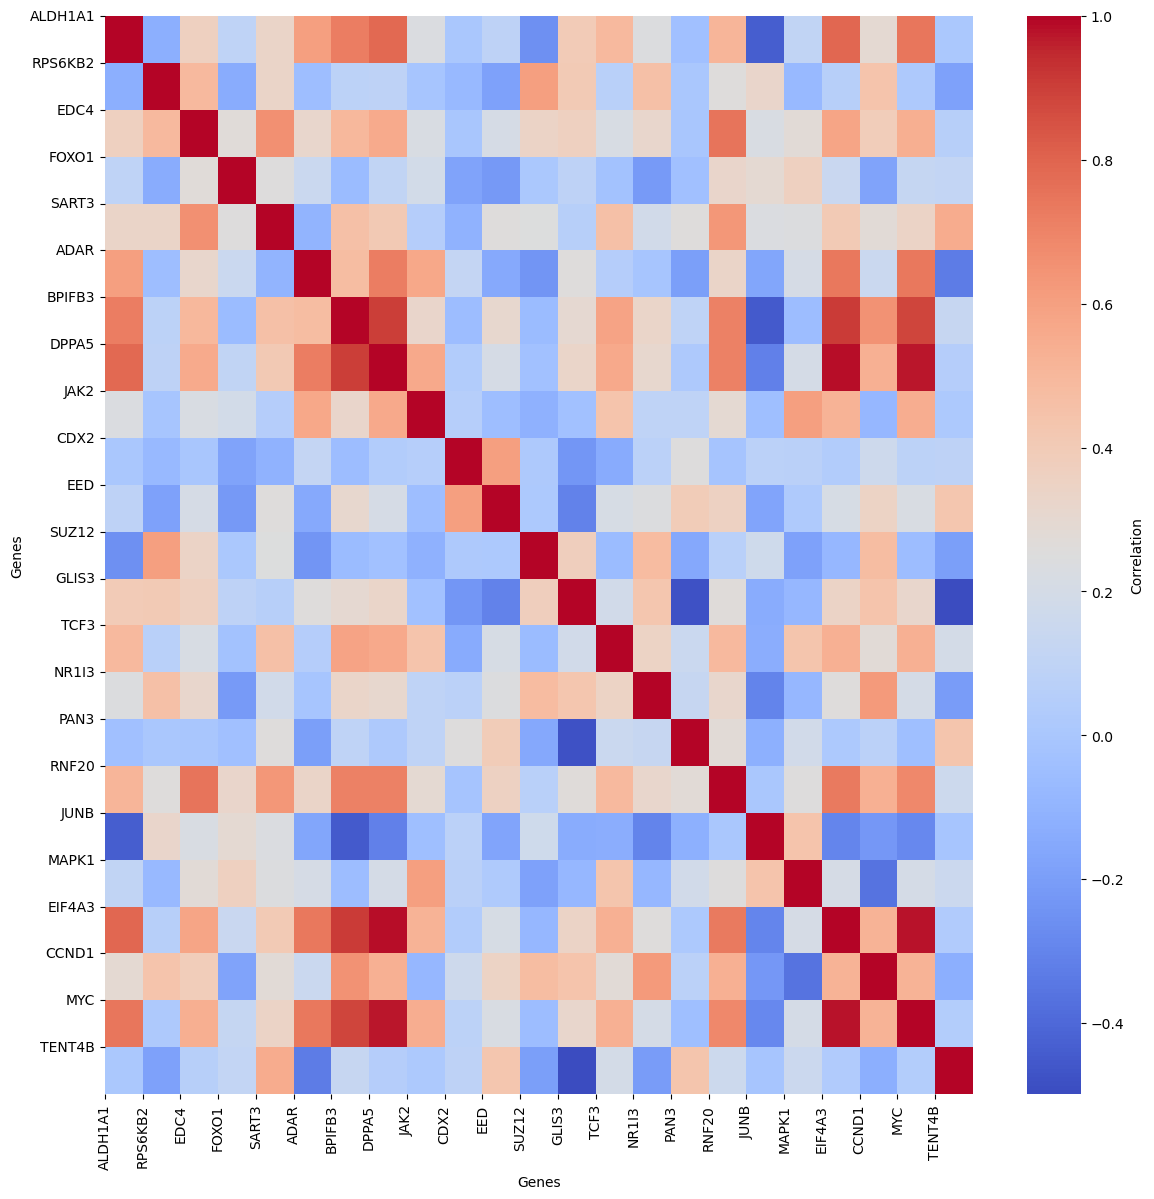

In [386]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'gene_labels' is a list of gene labels corresponding to 'common_top_gene_indices_f_and_r'
gene_labels = finalgenes  # replace with actual gene labels

# A = Delta_gctx.data_df.to_numpy()
# A = A[non_zero_cols_r]
A = A_new[non_zero_cols_r]
Acorr = np.corrcoef(A[common_top_pert_indices_f_and_r][:, common_top_gene_indices_f_and_r], rowvar=False)

fig, axs = plt.subplots(1, 1, figsize=(14, 14))

sns.heatmap(Acorr, cmap='coolwarm', ax=axs, cbar_kws={'label': 'Correlation'})
axs.set_xlabel('Genes')
axs.set_ylabel('Genes')

# Add gene labels after plotting the heatmap
axs.set_xticks(range(len(gene_labels)))
axs.set_yticks(range(len(gene_labels)))
axs.set_xticklabels(gene_labels, rotation=90)
axs.set_yticklabels(gene_labels, rotation=0)

plt.show()

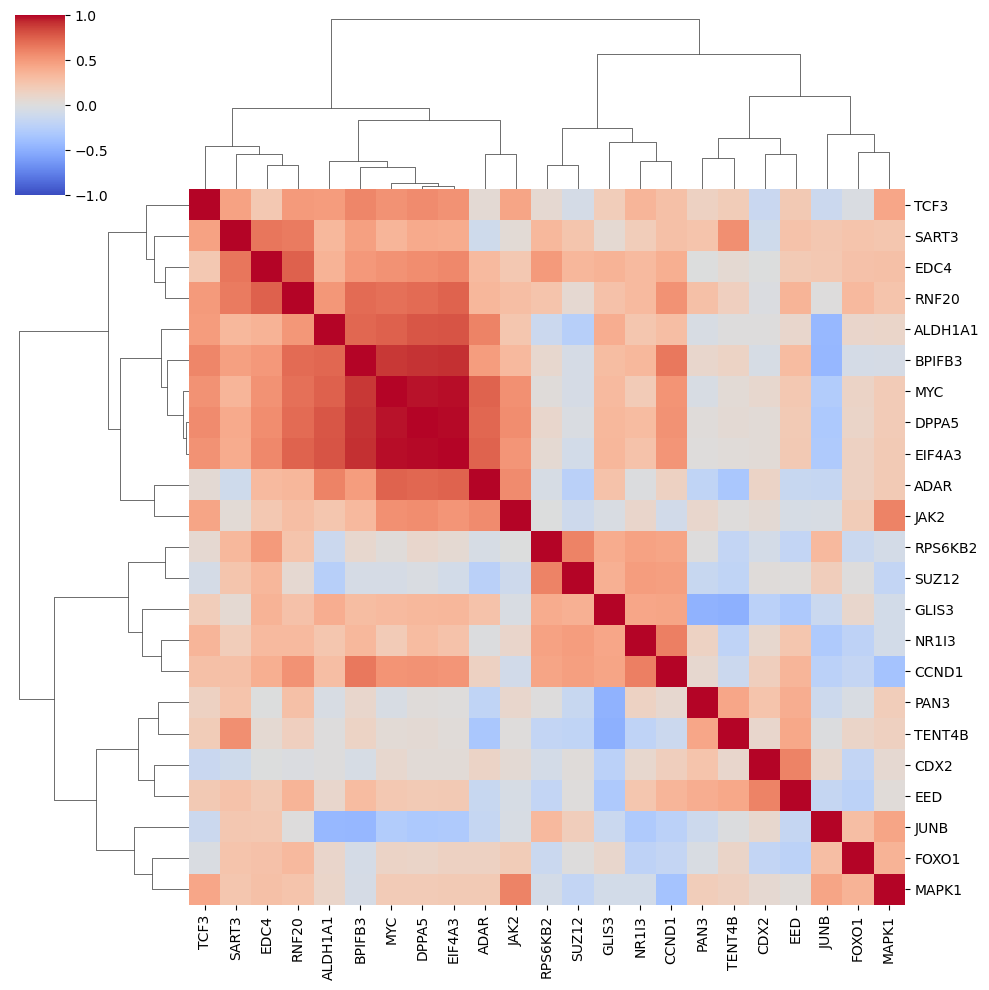

In [387]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage

# Your correlation matrix and a list of labels corresponding to the indices

# Creating the linkage matrix for clustering
row_linkage = linkage(Acorr, method='ward')
col_linkage = linkage(Acorr.T, method='ward')  # Transpose for column clustering

# Creating a clustermap with labels
sns.clustermap(Acorr, cmap='coolwarm', figsize=(10, 10),
               row_cluster=True, col_cluster=True,
               row_linkage=row_linkage, col_linkage=col_linkage,
               xticklabels=gene_labels, yticklabels=gene_labels,vmin=-1, vmax=1)
plt.show()


In [388]:
gene_pair_index_r = []
for pair in gene_pairs_r:
    i,j = pair
    gene_pair_index_r.append([reversed_pair_mapping[i], reversed_pair_mapping[j]])
print(gene_pair_index_r)


print(pairgenes_r)
pairgenes_r = []
for i in range(len(nonzero_pairs)):
    gene1, gene2 = nonzero_pairs[i]
    if gene1 != gene2 and gene1 < gene2:
        pairgenes_r.append(gene1)
        pairgenes_r.append(gene2)

pairgenes_r = np.asarray(list(set(pairgenes_r)))
print(pairgenes_r)
len(pairgenes_r)


pert_column_ids = Delta_gctx.data_df.columns

input_genes = condensed_gene_perts.copy()
for i in range(len(input_genes)):
    input_genes[i] = input_genes[i][:-3]

perts_to_eid = {
    gene: item['element']
    for gene in input_genes
    for item in gene_dict
    if gene in item['last_two_words']
#     if gene in item['last_two_words'].split(',')
}
pert_to_gene_indices = {gene: pert_column_ids.get_loc(eid) for gene, eid in perts_to_eid.items() if eid in pert_column_ids}

    
common_top_genes_f_and_r = condensed_gene_perts[non_zero_cols_r][pairgenes_r]
for i in range(len(common_top_genes_f_and_r)):
    common_top_genes_f_and_r[i] = common_top_genes_f_and_r[i][:-3]   
# Assuming common_top_genes_f_and_r is a list of genes and pert_to_gene_indices is the dictionary mapping genes to indices

# List to store corresponding gene indices
common_top_gene_indices_f_and_r, common_top_pert_indices_f_and_r = [], []
count  = 0
finalgenes, finalgeneindex = [], []
# Iterate over each gene in common_top_genes_f_and_r
for gene in common_top_genes_f_and_r:
    # Check if the gene exists in pert_to_gene_indices
    if gene in pert_to_gene_indices:
        # Append the corresponding index to the list
        finalgenes.append(gene)
        finalgeneindex.append(pairgenes_r[count])
        common_top_gene_indices_f_and_r.append(pert_to_gene_indices[gene])
        common_top_pert_indices_f_and_r.append(pairgenes_r[count])
    else: print(gene)
    count += 1

# Print the list of gene indices
print("Corresponding gene indices:", common_top_gene_indices_f_and_r)
print("Corresponding pert indices:", common_top_pert_indices_f_and_r)

indtoind  = {finalgeneindex[i]: i for i in range(len(finalgeneindex))}

count = 0
newpairs = []
for pair in gene_pair_index_r:
    i,j = pair
    if i in finalgeneindex and j in finalgeneindex:
        newind1, newind2 = indtoind[i], indtoind[j]
#         print(Acorr[ind1,ind2])
        newpairs.append([newind1, newind2])
        count += 1
    else: print(i,j)


[[25, 23], [34, 8], [48, 146], [50, 48], [54, 115], [59, 85], [59, 115], [60, 58], [68, 50], [68, 146], [77, 115], [85, 54], [87, 77], [87, 146], [91, 146], [103, 50], [103, 146], [104, 50], [109, 50], [115, 20], [117, 77], [125, 50], [130, 34], [134, 7], [137, 77], [146, 23], [146, 25], [150, 25]]
[130 134   7   8 137 146  20 150  23  25  34  48  50  54  58  59  60  68
  77  85  87  91 103 104 109 115 117 125]
[130 134   7   8 137 146  20 150  23  25  34  48  50  54  58  59  60  68
  77  85  87  91 103 104 109 115 117 125]
IKBKB
MITF
SMARCA4
COP1
UNC5A
Corresponding gene indices: [4599, 50587, 39659, 37096, 21867, 49119, 48645, 48118, 6233, 43302, 31161, 14890, 3892, 40172, 28736, 47541, 35441, 9147, 29914, 16228, 35387, 50014, 40433]
Corresponding pert indices: [130, 134, 7, 137, 146, 20, 150, 23, 25, 34, 48, 50, 54, 58, 68, 85, 87, 103, 104, 109, 115, 117, 125]
34 8
59 85
59 115
60 58
77 115
87 77
91 146
117 77
137 77


In [389]:
# Create the finalgenes_ann list
finalgenes_ann = []

# Populate finalgenes_ann with corresponding annotations from condensed_gene_perts
for gene in finalgenes:
    for annotated_gene in condensed_gene_perts:
        if gene in annotated_gene:
            finalgenes_ann.append(annotated_gene)
            break

# Print the finalgenes_ann list
print("\nFinalgenes_ann list with annotations:")
print(finalgenes_ann)


Finalgenes_ann list with annotations:
['ALDH1A1 kd', 'RPS6KB2 kd', 'EDC4 kd', 'FOXO1 kd', 'SART3 kd', 'ADAR kd', 'BPIFB3 kd', 'DPPA5 kd', 'JAK2 kd', 'CDX2 oe', 'EED kd', 'SUZ12 kd', 'GLIS3 kd', 'TCF3 kd', 'NR1I3 kd', 'PAN3 kd', 'RNF20 kd', 'JUNB kd', 'MAPK1 kd', 'EIF4A3 kd', 'CCND1 oe', 'MYCN kd', 'TENT4B oe']


1 JAK2 DPPA5
2 EED SART3
3 SUZ12 EED
4 GLIS3 CCND1
5 NR1I3 SUZ12
6 NR1I3 SART3
7 PAN3 GLIS3
8 RNF20 SART3
9 JUNB SUZ12
10 JUNB SART3
11 MAPK1 SUZ12
12 EIF4A3 SUZ12
13 CCND1 ADAR
14 TENT4B SUZ12
15 ALDH1A1 CDX2
16 RPS6KB2 EDC4
17 SART3 DPPA5
18 SART3 JAK2
19 BPIFB3 JAK2


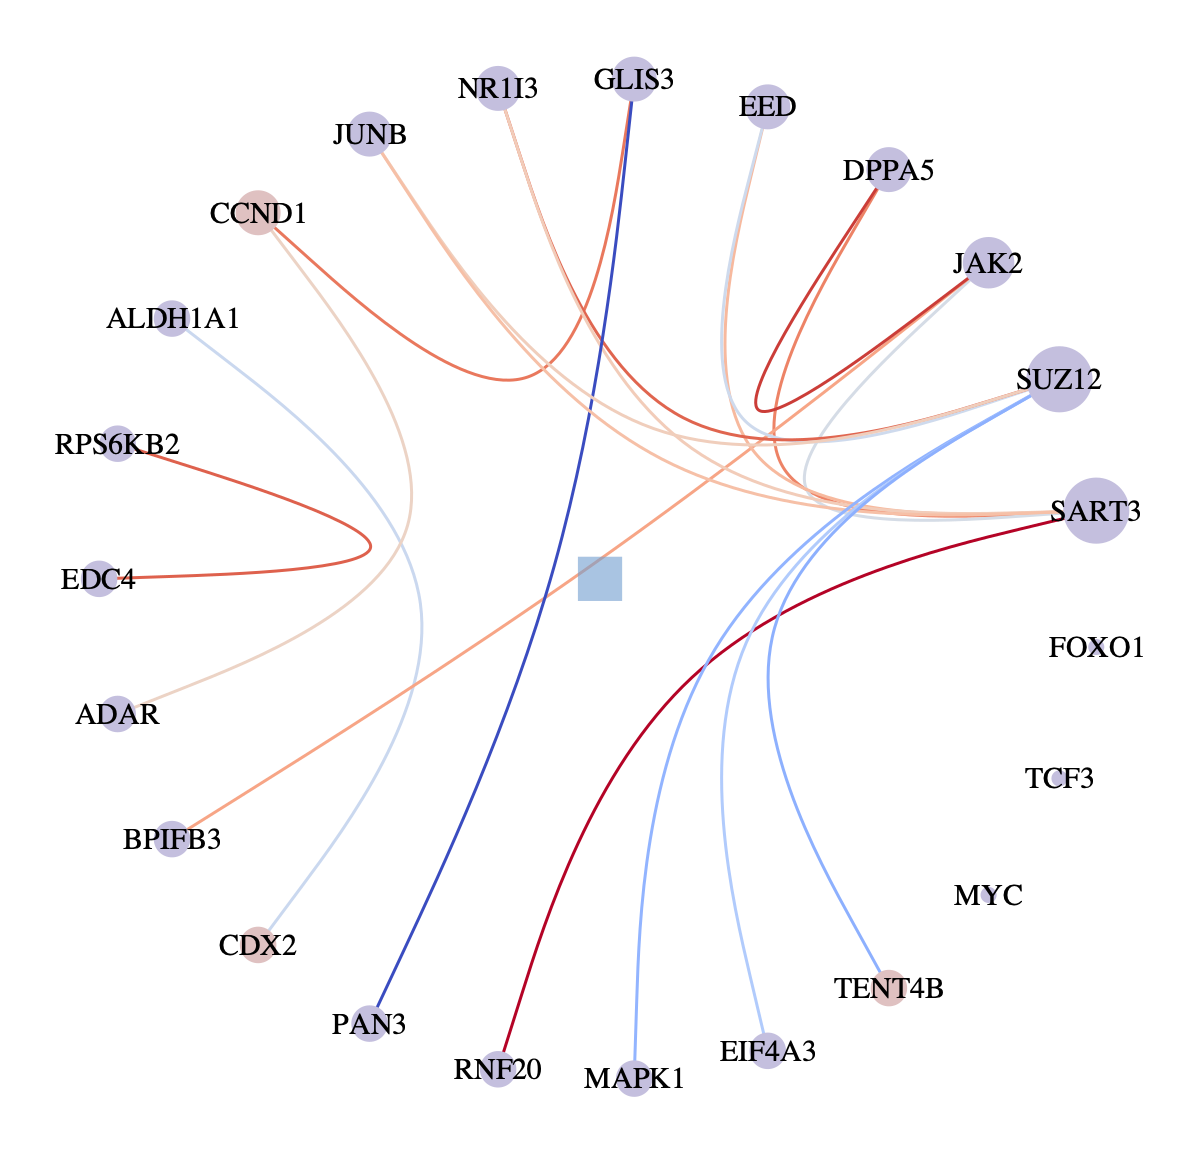

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1682ec0d0, at 0x29a0c9790>,
 <GraphView object, directed, with 24 vertices and 23 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x299cd8bd0, at 0x2eab31e10>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x299cd8bd0, at 0x28d64bd90>, False), at 0x299cd8bd0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x299cd8bd0, at 0x298e07d50>)

In [390]:
# reverse
import numpy as np


import matplotlib
    
import graph_tool.all as gt

# # Find pairs of nonzero indices
# nonzero_pairs = newpairs
# # Create a mapping from original pair to renumbered pair
# pair_mapping = {}
# new_pair_id = 0

# for pair in nonzero_pairs:
#     pair = tuple(pair)
#     if pair[0] != pair[1] and pair not in pair_mapping:
#         if pair[0] not in pair_mapping:
#             pair_mapping[pair[0]] = new_pair_id
#             new_pair_id += 1
#         if pair[1] not in pair_mapping:
#             pair_mapping[pair[1]] = new_pair_id
#             new_pair_id += 1

# newly_numbered_pairs = [(pair_mapping[pair[0]], pair_mapping[pair[1]]) for pair in nonzero_pairs if pair[0] != pair[1]]
# reversed_pair_mapping = {v: k for k, v in pair_mapping.items()}

# def create_graph_from_corr_matrix_gt(corr_matrix, centrality, weights, threshold=1.):
def create_graph_from_corr_matrix_gt(pairs, newfingenes):
    # Create an empty graph
    g = gt.Graph(directed=False)
#     vertices = [g.add_vertex() for _ in range(1+max(np.array(pairs).flatten()))]
    vertices = [g.add_vertex() for _ in range(len(newfingenes))]
    
    gene_pairs_r = []
    
    weights = g.new_edge_property("double")
    count = 0
#     print(pairs)
    gene_pairs_r = []
    for pair in pairs:
        i,j = pair
        e = g.add_edge(vertices[i], vertices[j])
        weights[e] = Acorr[i][j]
        count += 1
        print(count, finalgenes[i] +' '+ finalgenes[j])
        gene_pairs_r.append(finalgenes[i] +' '+ finalgenes[j])
        
        
    g.edge_properties["weight"] = weights
    
     
    
    return g, weights, gene_pairs_r




g, weights, gene_pairs_r_final = create_graph_from_corr_matrix_gt(np.array(newpairs), finalgenes)
v_labels = g.new_vertex_property("string")
count = 0
for v in g.vertices():
#     print('vertex v = ', v)
    genestr = finalgenes[count]
    v_labels[v] = genestr

    count += 1
g.vertex_properties["labels"] = v_labels

# Create a vertex property map to store the colors

import matplotlib.colors as mcolors
import colorsys
oe_color = "indianred"
kd_color = "slateblue"
# Function to adjust hue to pastel
def make_pastel(color):
    rgb = mcolors.to_rgb(color)
    h, l, s = colorsys.rgb_to_hls(*rgb)
    s *= 0.6  # Reduce saturation
    l *= 1.4  # Increase lightness
    l = min(l, 1.0)  # Ensure lightness does not exceed 1.0
    pastel_rgb = colorsys.hls_to_rgb(h, l, s)
    return pastel_rgb

# Adjust colors to pastel
oe_color_pastel = make_pastel(oe_color)
kd_color_pastel = make_pastel(kd_color)

# Apply colors to vertices
vertex_colors = g.new_vertex_property("vector<float>")
count = 0
for v in g.vertices():
    if finalgenes_ann[count][-2:] == 'kd':
        vertex_colors[v] = kd_color_pastel
    else:
        vertex_colors[v] = oe_color_pastel
    count += 1

# Set the vertex property map as the vertex color property
g.vertex_properties["color"] = vertex_colors


state = gt.minimize_nested_blockmodel_dl(g,
                                         state_args=dict(base_type=gt.LayeredBlockState,
                                                         state_args=dict(ec=weights, layers=False)))

# state = gt.minimize_nested_blockmodel_dl(g)

state.draw(edge_color=g.ep.weight, edge_gradient=[],
           ecmap=(matplotlib.cm.coolwarm, 1.), edge_pen_width=1.5,
           output_size=(600, 600),vertex_fill_color=g.vertex_properties["color"], vertex_color=g.vertex_properties["color"] ,\
           vertex_text=g.vertex_properties["labels"],\
           vertex_text_color='black',vertex_font_size=15,vertex_text_position=-3)


state.draw(edge_color=g.ep.weight, edge_gradient=[],
           ecmap=(matplotlib.cm.coolwarm, 1.), edge_pen_width=1.5,
           output_size=(500, 500),vertex_fill_color=g.vertex_properties["color"], vertex_color=g.vertex_properties["color"] ,\
           vertex_text=g.vertex_properties["labels"],\
           vertex_text_color='black',vertex_font_size=15,vertex_text_position=-3, output="reverse_net_ib.pdf")
        

    

In [58]:
import gseapy as gp
# default: Human
names = gp.get_library_name()
names

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [60]:
gene_sets=['ChEA_2022', 'ENCODE_and_ChEA_Consensus_TFs_from_ChIP-X',\
           'TF_Perturbations_Followed_by_Expression','Reactome_2022', 'BioPlanet_2019',\
           'WikiPathway_2023_Human', ]
pairs_terms_f, pair_annotations_f= {}, {}
for gene_pair in gene_pairs_f_final:
    gene_list = gene_pair.split()
    print(gene_list)
    enr = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                     gene_sets=gene_sets,
                     organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                     outdir=None, # don't write to disk
                    )
#     print(enr.results['Genes'])

    term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']
    
   
    pairs_terms_f[gene_pair] = term_enr
    
    if len(term_enr)== 0:
        print('none found')
    else:
        terms_single = []
        for i in range(len(term_enr)):
            terms_single.append(term_enr.iloc[i].split()[0])
        pair_annotations_f[gene_pair] = set(terms_single)
        print(term_enr)
        print(pair_annotations_f[gene_pair])
        

pairs_terms_r, pair_annotations_r= {}, {}
for gene_pair in gene_pairs_r_final:
    gene_list = gene_pair.split()
    print(gene_list)
    enr = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                     gene_sets=gene_sets,
                     organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                     outdir=None, # don't write to disk
                    )
#     print(enr.results['Genes'])

    term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']
    
   
    pairs_terms_r[gene_pair] = term_enr
    
    if len(term_enr)== 0:
        print('none found')
    else:
        terms_single = []
        for i in range(len(term_enr)):
            terms_single.append(term_enr.iloc[i].split()[0])
        pair_annotations_r[gene_pair] = set(terms_single)
        print(term_enr)
        print(pair_annotations_r[gene_pair])
#     break

['EDC4', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


140    Deadenylation-dependent mRNA Decay R-HSA-429914
141                    Metabolism Of RNA R-HSA-8953854
144                 Deadenylation-dependent mRNA decay
147                                    Gene expression
Name: Term, dtype: object
{'Gene', 'Metabolism', 'Deadenylation-dependent'}
['TRIM71', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


215            GATA2 OE HESC HUMAN GSE57395 RNASEQ DOWN
216             EZH2 KO HESC HUMAN GSE76626 RNASEQ DOWN
217    ATF6 ACTIVATION HESC HUMAN GSE106847 RNASEQ DOWN
218       ZNF503 SHRNA H1 HUMAN GSE69618 DAY6 RNASEQ UP
358                          Immune System R-HSA-168256
Name: Term, dtype: object
{'ZNF503', 'Immune', 'GATA2', 'ATF6', 'EZH2'}
['TRIM71', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['TRIM71', 'FOXO1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


179    SOX2 OE HUMAN GSE34920 CREEDSID GENE 1422 DOWN
249                        Immune System R-HSA-168256
314                   Endoderm Differentiation WP2853
Name: Term, dtype: object
{'Endoderm', 'Immune', 'SOX2'}
['STK11', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['CBFB', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['NR1I3', 'TENT4B']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


55    PPARA ACTIVATION MOUSE GSE17250 CREEDSID GENE ...
56        TET2 KO MOUSE GSE27816 CREEDSID GENE 457 DOWN
57       TET2 KO MOUSE GSE27816 CREEDSID GENE 3127 DOWN
Name: Term, dtype: object
{'PPARA', 'TET2'}
['SLIRP', 'ARID1A']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['SLIRP', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MIR126', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MIR126', 'TENT4B']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['ADAR', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['ADAR', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['ADAR', 'PROX1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['PAN3', 'NSD3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RNF20', 'NR1I3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['JUNB', 'RNF20']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['JUNB', 'RNF43']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MAPK1', 'BCL11B']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MAPK1', 'BMPR2']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RBPJ', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RBPJ', 'TFEB']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['TUT4', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


155    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1077 UP
156    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1076 UP
293                   Metabolism Of RNA R-HSA-8953854
Name: Term, dtype: object
{'Metabolism', 'TWIST1'}
['TUT4', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['TUT4', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


155    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1077 UP
156    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1076 UP
293                   Metabolism Of RNA R-HSA-8953854
Name: Term, dtype: object
{'Metabolism', 'TWIST1'}
['TUT4', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['CCND1', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MYC', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['PTHLH', 'RNF20']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GLIS3', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


224    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1071 UP
225    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1078 UP
Name: Term, dtype: object
{'TWIST1'}
['GLIS3', 'CCND1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GLIS3', 'GLIS3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GLIS3', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GLIS3', 'CCND1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['TENT4B', 'EED']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['CEBPA', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


238         ARID2 SIRNA HEPG2 HUMAN GSE69567 RNASEQ DOWN
239    SETDB1 KD THP1 HUMAN GSE103409 SGRNA9DAY4 RNAS...
240    SETDB1 KD THP1 HUMAN GSE103409 SGRNA9DAY7 RNAS...
241    SETDB1 KD THP1 HUMAN GSE103409 SGRNA6DAY7 RNAS...
Name: Term, dtype: object
{'SETDB1', 'ARID2'}
['CEBPA', 'TRIM71']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['CEBPA', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


156    TET2 KO MOUSE GSE27816 CREEDSID GENE 456 DOWN
Name: Term, dtype: object
{'TET2'}
['ALDH1A1', 'PROX1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['FOXO1', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MYC', 'TUT4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


222        AFF1 SHRNA HELA HUMAN GSE69021 RNASEQ DOWN
223    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1077 UP
224    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1076 UP
432                   Metabolism Of RNA R-HSA-8953854
Name: Term, dtype: object
{'Metabolism', 'TWIST1', 'AFF1'}
['MYC', 'CEBPA']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MYC', 'RNF43']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MYC', 'FLI1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


307       SOX9 OE MOUSE GSE34060 CREEDSID GENE 2743 DOWN
308       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1604 DOWN
309       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1602 DOWN
310       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1607 DOWN
311       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1609 DOWN
312       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1608 DOWN
313       JUND KD HUMAN GSE50588 CREEDSID GENE 2812 DOWN
314       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1611 DOWN
315       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1595 DOWN
316       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1612 DOWN
317          FOXO1 KD MOUSE GSE6623 CREEDSID GENE 505 UP
318       SOX2 KO HUMAN GSE59234 CREEDSID GENE 2957 DOWN
319    FLI1 EWSFUSION EXPRESSION HUMAN GSE1822 CREEDS...
320               ADAR KD HUVEC HUMAN GSE60217 RNASEQ UP
544    Transcriptional Regulation Of Granulopoiesis R...
553                  Developmental Biology R-HSA-1266738
Name: Term, dtype: object
{'Developmental', 'SOX9', 'FLI1', 'Transcriptional', 'SOX2', '

/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


253                                          RFX5 ENCODE
254                                            TCF3 CHEA
286        WT1 KO MOUSE GSE15326 CREEDSID GENE 2248 DOWN
287        HEY2 KO MOUSE GSE6526 CREEDSID GENE 1508 DOWN
288          HEY2 KO MOUSE GSE6526 CREEDSID GENE 1509 UP
289       HSF1 KO MOUSE GSE41005 CREEDSID GENE 2143 DOWN
290       ZNF589 SIRNA MDAMB231 HUMAN GSE79586 RNASEQ UP
291         GATA3 OE MDAMB231 HUMAN GSE72141 RNASEQ DOWN
292         GLI1 SIRNA HCT116 HUMAN GSE56788 RNASEQ DOWN
520    NOTCH1 Intracellular Domain Regulates Transcri...
521    Constitutive Signaling By NOTCH1 HD+PEST Domai...
522                    Signaling By NOTCH1 R-HSA-1980143
523    Transcriptional Regulation By RUNX3 R-HSA-8878159
524                      Signaling By NOTCH R-HSA-157118
525    Diseases Of Signal Transduction By Growth Fact...
540                  Developmental Biology R-HSA-1266738
542           Generic Transcription Pathway R-HSA-212436
546          RNA Polymerase II 

/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RNF43', 'CEBPA']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RNF43', 'MAPK1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


215    Diseases Of Signal Transduction By Growth Fact...
291                                Disease R-HSA-1643685
321                     Signal Transduction R-HSA-162582
Name: Term, dtype: object
{'Disease', 'Diseases', 'Signal'}
['RNF43', 'GPD1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


0    STAT5B 24692510 ChIP-Seq Epithelium Mouse Mammary
1        NR3C1 34362910 ChIP-Seq WistarRat Hippocampus
2    NR3C1 34362910 ChIP-Seq WistarRat Hippocampus ...
Name: Term, dtype: object
{'STAT5B', 'NR3C1'}
['GPD1', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


192    IRF9 OE HUMAN GSE50002 CREEDSID GENE 1653 UP
193    IRF9 OE HUMAN GSE50002 CREEDSID GENE 1656 UP
Name: Term, dtype: object
{'IRF9'}
['GPD1', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GPD1', 'TUT4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GPD1', 'CEBPA']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['EDC4', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


140    Deadenylation-dependent mRNA Decay R-HSA-429914
141                    Metabolism Of RNA R-HSA-8953854
144                 Deadenylation-dependent mRNA decay
147                                    Gene expression
Name: Term, dtype: object
{'Gene', 'Metabolism', 'Deadenylation-dependent'}
['TRIM71', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


215            GATA2 OE HESC HUMAN GSE57395 RNASEQ DOWN
216             EZH2 KO HESC HUMAN GSE76626 RNASEQ DOWN
217    ATF6 ACTIVATION HESC HUMAN GSE106847 RNASEQ DOWN
218       ZNF503 SHRNA H1 HUMAN GSE69618 DAY6 RNASEQ UP
358                          Immune System R-HSA-168256
Name: Term, dtype: object
{'ZNF503', 'Immune', 'GATA2', 'ATF6', 'EZH2'}
['TRIM71', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['TRIM71', 'FOXO1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


179    SOX2 OE HUMAN GSE34920 CREEDSID GENE 1422 DOWN
249                        Immune System R-HSA-168256
314                   Endoderm Differentiation WP2853
Name: Term, dtype: object
{'Endoderm', 'Immune', 'SOX2'}
['STK11', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['CBFB', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['NR1I3', 'TENT4B']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


55    PPARA ACTIVATION MOUSE GSE17250 CREEDSID GENE ...
56        TET2 KO MOUSE GSE27816 CREEDSID GENE 457 DOWN
57       TET2 KO MOUSE GSE27816 CREEDSID GENE 3127 DOWN
Name: Term, dtype: object
{'PPARA', 'TET2'}
['SLIRP', 'ARID1A']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['SLIRP', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MIR126', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MIR126', 'TENT4B']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['ADAR', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['ADAR', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['ADAR', 'PROX1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['PAN3', 'NSD3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RNF20', 'NR1I3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['JUNB', 'RNF20']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['JUNB', 'RNF43']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MAPK1', 'BCL11B']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MAPK1', 'BMPR2']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RBPJ', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RBPJ', 'TFEB']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['TUT4', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


155    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1077 UP
156    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1076 UP
293                   Metabolism Of RNA R-HSA-8953854
Name: Term, dtype: object
{'Metabolism', 'TWIST1'}
['TUT4', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['TUT4', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


155    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1077 UP
156    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1076 UP
293                   Metabolism Of RNA R-HSA-8953854
Name: Term, dtype: object
{'Metabolism', 'TWIST1'}
['TUT4', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['CCND1', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MYC', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['PTHLH', 'RNF20']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GLIS3', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


224    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1071 UP
225    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1078 UP
Name: Term, dtype: object
{'TWIST1'}
['GLIS3', 'CCND1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GLIS3', 'GLIS3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GLIS3', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GLIS3', 'CCND1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['TENT4B', 'EED']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['CEBPA', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


238         ARID2 SIRNA HEPG2 HUMAN GSE69567 RNASEQ DOWN
239    SETDB1 KD THP1 HUMAN GSE103409 SGRNA9DAY4 RNAS...
240    SETDB1 KD THP1 HUMAN GSE103409 SGRNA9DAY7 RNAS...
241    SETDB1 KD THP1 HUMAN GSE103409 SGRNA6DAY7 RNAS...
Name: Term, dtype: object
{'SETDB1', 'ARID2'}
['CEBPA', 'TRIM71']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['CEBPA', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


156    TET2 KO MOUSE GSE27816 CREEDSID GENE 456 DOWN
Name: Term, dtype: object
{'TET2'}
['ALDH1A1', 'PROX1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['FOXO1', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MYC', 'TUT4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


222        AFF1 SHRNA HELA HUMAN GSE69021 RNASEQ DOWN
223    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1077 UP
224    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1076 UP
432                   Metabolism Of RNA R-HSA-8953854
Name: Term, dtype: object
{'Metabolism', 'TWIST1', 'AFF1'}
['MYC', 'CEBPA']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MYC', 'RNF43']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MYC', 'FLI1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


307       SOX9 OE MOUSE GSE34060 CREEDSID GENE 2743 DOWN
308       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1604 DOWN
309       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1602 DOWN
310       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1607 DOWN
311       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1609 DOWN
312       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1608 DOWN
313       JUND KD HUMAN GSE50588 CREEDSID GENE 2812 DOWN
314       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1611 DOWN
315       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1595 DOWN
316       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1612 DOWN
317          FOXO1 KD MOUSE GSE6623 CREEDSID GENE 505 UP
318       SOX2 KO HUMAN GSE59234 CREEDSID GENE 2957 DOWN
319    FLI1 EWSFUSION EXPRESSION HUMAN GSE1822 CREEDS...
320               ADAR KD HUVEC HUMAN GSE60217 RNASEQ UP
544    Transcriptional Regulation Of Granulopoiesis R...
553                  Developmental Biology R-HSA-1266738
Name: Term, dtype: object
{'Developmental', 'SOX9', 'FLI1', 'Transcriptional', 'SOX2', '

/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


253                                          RFX5 ENCODE
254                                            TCF3 CHEA
286        WT1 KO MOUSE GSE15326 CREEDSID GENE 2248 DOWN
287        HEY2 KO MOUSE GSE6526 CREEDSID GENE 1508 DOWN
288          HEY2 KO MOUSE GSE6526 CREEDSID GENE 1509 UP
289       HSF1 KO MOUSE GSE41005 CREEDSID GENE 2143 DOWN
290       ZNF589 SIRNA MDAMB231 HUMAN GSE79586 RNASEQ UP
291         GATA3 OE MDAMB231 HUMAN GSE72141 RNASEQ DOWN
292         GLI1 SIRNA HCT116 HUMAN GSE56788 RNASEQ DOWN
520    NOTCH1 Intracellular Domain Regulates Transcri...
521    Constitutive Signaling By NOTCH1 HD+PEST Domai...
522                    Signaling By NOTCH1 R-HSA-1980143
523    Transcriptional Regulation By RUNX3 R-HSA-8878159
524                      Signaling By NOTCH R-HSA-157118
525    Diseases Of Signal Transduction By Growth Fact...
540                  Developmental Biology R-HSA-1266738
542           Generic Transcription Pathway R-HSA-212436
546          RNA Polymerase II 

/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RNF43', 'CEBPA']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RNF43', 'MAPK1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


215    Diseases Of Signal Transduction By Growth Fact...
291                                Disease R-HSA-1643685
321                     Signal Transduction R-HSA-162582
Name: Term, dtype: object
{'Disease', 'Diseases', 'Signal'}
['RNF43', 'GPD1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


0    STAT5B 24692510 ChIP-Seq Epithelium Mouse Mammary
1        NR3C1 34362910 ChIP-Seq WistarRat Hippocampus
2    NR3C1 34362910 ChIP-Seq WistarRat Hippocampus ...
Name: Term, dtype: object
{'STAT5B', 'NR3C1'}
['GPD1', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


192    IRF9 OE HUMAN GSE50002 CREEDSID GENE 1653 UP
193    IRF9 OE HUMAN GSE50002 CREEDSID GENE 1656 UP
Name: Term, dtype: object
{'IRF9'}
['GPD1', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GPD1', 'TUT4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GPD1', 'CEBPA']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['EDC4', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


140    Deadenylation-dependent mRNA Decay R-HSA-429914
141                    Metabolism Of RNA R-HSA-8953854
144                 Deadenylation-dependent mRNA decay
147                                    Gene expression
Name: Term, dtype: object
{'Gene', 'Metabolism', 'Deadenylation-dependent'}
['TRIM71', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


215            GATA2 OE HESC HUMAN GSE57395 RNASEQ DOWN
216             EZH2 KO HESC HUMAN GSE76626 RNASEQ DOWN
217    ATF6 ACTIVATION HESC HUMAN GSE106847 RNASEQ DOWN
218       ZNF503 SHRNA H1 HUMAN GSE69618 DAY6 RNASEQ UP
358                          Immune System R-HSA-168256
Name: Term, dtype: object
{'ZNF503', 'Immune', 'GATA2', 'ATF6', 'EZH2'}
['TRIM71', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['TRIM71', 'FOXO1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


179    SOX2 OE HUMAN GSE34920 CREEDSID GENE 1422 DOWN
249                        Immune System R-HSA-168256
314                   Endoderm Differentiation WP2853
Name: Term, dtype: object
{'Endoderm', 'Immune', 'SOX2'}
['STK11', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['CBFB', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['NR1I3', 'TENT4B']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


55    PPARA ACTIVATION MOUSE GSE17250 CREEDSID GENE ...
56        TET2 KO MOUSE GSE27816 CREEDSID GENE 457 DOWN
57       TET2 KO MOUSE GSE27816 CREEDSID GENE 3127 DOWN
Name: Term, dtype: object
{'PPARA', 'TET2'}
['SLIRP', 'ARID1A']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['SLIRP', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MIR126', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MIR126', 'TENT4B']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['ADAR', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['ADAR', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['ADAR', 'PROX1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['PAN3', 'NSD3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RNF20', 'NR1I3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['JUNB', 'RNF20']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['JUNB', 'RNF43']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MAPK1', 'BCL11B']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MAPK1', 'BMPR2']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RBPJ', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RBPJ', 'TFEB']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['TUT4', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


155    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1077 UP
156    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1076 UP
293                   Metabolism Of RNA R-HSA-8953854
Name: Term, dtype: object
{'Metabolism', 'TWIST1'}
['TUT4', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['TUT4', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


155    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1077 UP
156    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1076 UP
293                   Metabolism Of RNA R-HSA-8953854
Name: Term, dtype: object
{'Metabolism', 'TWIST1'}
['TUT4', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['CCND1', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MYC', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['PTHLH', 'RNF20']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GLIS3', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


224    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1071 UP
225    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1078 UP
Name: Term, dtype: object
{'TWIST1'}
['GLIS3', 'CCND1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GLIS3', 'GLIS3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GLIS3', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GLIS3', 'CCND1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['TENT4B', 'EED']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['CEBPA', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


238         ARID2 SIRNA HEPG2 HUMAN GSE69567 RNASEQ DOWN
239    SETDB1 KD THP1 HUMAN GSE103409 SGRNA9DAY4 RNAS...
240    SETDB1 KD THP1 HUMAN GSE103409 SGRNA9DAY7 RNAS...
241    SETDB1 KD THP1 HUMAN GSE103409 SGRNA6DAY7 RNAS...
Name: Term, dtype: object
{'SETDB1', 'ARID2'}
['CEBPA', 'TRIM71']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['CEBPA', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


156    TET2 KO MOUSE GSE27816 CREEDSID GENE 456 DOWN
Name: Term, dtype: object
{'TET2'}
['ALDH1A1', 'PROX1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['FOXO1', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MYC', 'TUT4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


222        AFF1 SHRNA HELA HUMAN GSE69021 RNASEQ DOWN
223    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1077 UP
224    TWIST1 OE MOUSE GSE50002 CREEDSID GENE 1076 UP
432                   Metabolism Of RNA R-HSA-8953854
Name: Term, dtype: object
{'Metabolism', 'TWIST1', 'AFF1'}
['MYC', 'CEBPA']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MYC', 'RNF43']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MYC', 'FLI1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


307       SOX9 OE MOUSE GSE34060 CREEDSID GENE 2743 DOWN
308       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1604 DOWN
309       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1602 DOWN
310       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1607 DOWN
311       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1609 DOWN
312       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1608 DOWN
313       JUND KD HUMAN GSE50588 CREEDSID GENE 2812 DOWN
314       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1611 DOWN
315       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1595 DOWN
316       FLI1 KD HUMAN GSE27524 CREEDSID GENE 1612 DOWN
317          FOXO1 KD MOUSE GSE6623 CREEDSID GENE 505 UP
318       SOX2 KO HUMAN GSE59234 CREEDSID GENE 2957 DOWN
319    FLI1 EWSFUSION EXPRESSION HUMAN GSE1822 CREEDS...
320               ADAR KD HUVEC HUMAN GSE60217 RNASEQ UP
544    Transcriptional Regulation Of Granulopoiesis R...
553                  Developmental Biology R-HSA-1266738
Name: Term, dtype: object
{'Developmental', 'SOX9', 'FLI1', 'Transcriptional', 'SOX2', '

/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


253                                          RFX5 ENCODE
254                                            TCF3 CHEA
286        WT1 KO MOUSE GSE15326 CREEDSID GENE 2248 DOWN
287        HEY2 KO MOUSE GSE6526 CREEDSID GENE 1508 DOWN
288          HEY2 KO MOUSE GSE6526 CREEDSID GENE 1509 UP
289       HSF1 KO MOUSE GSE41005 CREEDSID GENE 2143 DOWN
290       ZNF589 SIRNA MDAMB231 HUMAN GSE79586 RNASEQ UP
291         GATA3 OE MDAMB231 HUMAN GSE72141 RNASEQ DOWN
292         GLI1 SIRNA HCT116 HUMAN GSE56788 RNASEQ DOWN
520    NOTCH1 Intracellular Domain Regulates Transcri...
521    Constitutive Signaling By NOTCH1 HD+PEST Domai...
522                    Signaling By NOTCH1 R-HSA-1980143
523    Transcriptional Regulation By RUNX3 R-HSA-8878159
524                      Signaling By NOTCH R-HSA-157118
525    Diseases Of Signal Transduction By Growth Fact...
540                  Developmental Biology R-HSA-1266738
542           Generic Transcription Pathway R-HSA-212436
546          RNA Polymerase II 

/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RNF43', 'CEBPA']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RNF43', 'MAPK1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


215    Diseases Of Signal Transduction By Growth Fact...
291                                Disease R-HSA-1643685
321                     Signal Transduction R-HSA-162582
Name: Term, dtype: object
{'Disease', 'Diseases', 'Signal'}
['RNF43', 'GPD1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


0    STAT5B 24692510 ChIP-Seq Epithelium Mouse Mammary
1        NR3C1 34362910 ChIP-Seq WistarRat Hippocampus
2    NR3C1 34362910 ChIP-Seq WistarRat Hippocampus ...
Name: Term, dtype: object
{'STAT5B', 'NR3C1'}
['GPD1', 'ADAR']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


192    IRF9 OE HUMAN GSE50002 CREEDSID GENE 1653 UP
193    IRF9 OE HUMAN GSE50002 CREEDSID GENE 1656 UP
Name: Term, dtype: object
{'IRF9'}
['GPD1', 'PAN3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GPD1', 'TUT4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['GPD1', 'CEBPA']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['EDC4', 'RPS6KB2']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['JAK2', 'DPPA5']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['EED', 'MYC']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


259                                          E2F4 ENCODE
260                                            E2F1 CHEA
261                                            TCF3 CHEA
262                                           PML ENCODE
288        ESRRA KD HUMAN GSE50588 CREEDSID GENE 2821 UP
289       E2F1 KD HUMAN GSE50588 CREEDSID GENE 2781 DOWN
290    FOXP3 ACTIVATION HUMAN GSE41087 CREEDSID GENE ...
511           Cellular Responses To Stress R-HSA-2262752
512          Cellular Responses To Stimuli R-HSA-8953897
517                  Developmental Biology R-HSA-1266738
519           Generic Transcription Pathway R-HSA-212436
524          RNA Polymerase II Transcription R-HSA-73857
528          Gene Expression (Transcription) R-HSA-74160
536                                Disease R-HSA-1643685
557                     Signal Transduction R-HSA-162582
670                    5Q35 Copy Number Variation WP5380
671                          Pleural Mesothelioma WP5087
Name: Term, dtype: object
{'5Q3

/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['SUZ12', 'EED']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


150                                             MYC CHEA
151                                          E2F4 ENCODE
164         MTF2 KD MOUSE GSE16364 CREEDSID GENE 1355 UP
221     Transcriptional Regulation By E2F6 R-HSA-8953750
222                   Defective Pyroptosis R-HSA-9710421
223        PRC2 Methylates Histones And DNA R-HSA-212300
224        PKMTs Methylate Histone Lysines R-HSA-3214841
225    Regulation Of PTEN Gene Transcription R-HSA-89...
226      Diseases Of Programmed Cell Death R-HSA-9645723
227    Activation Of HOX Genes During Differentiation...
228    Oxidative Stress Induced Senescence R-HSA-2559580
229                      HCMV Early Events R-HSA-9609690
230    Epigenetic Regulation Of Gene Expression R-HSA...
231                         HCMV Infection R-HSA-9609646
232                        PTEN Regulation R-HSA-6807070
233                    Cellular Senescence R-HSA-2559583
234            Chromatin Modifying Enzymes R-HSA-3247509
235           PIP3 Activates AK

/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['NR1I3', 'SUZ12']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['ADAR', 'TCF3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


241    GATA2 CHEA
Name: Term, dtype: object
{'GATA2'}
['ADAR', 'CCND1']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['ADAR', 'GLIS3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['ADAR', 'SOX2']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['PAN3', 'EDC4']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RNF20', 'SUZ12']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['RNF20', 'MYC']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


460    Post-translational Protein Modification R-HSA-...
474                  Metabolism Of Proteins R-HSA-392499
485                     Signal Transduction R-HSA-162582
Name: Term, dtype: object
{'Metabolism', 'Post-translational', 'Signal'}
['RNF20', 'SART3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


105    SPI1 CHEA
Name: Term, dtype: object
{'SPI1'}
['JUNB', 'SUZ12']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['JUNB', 'MYC']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['JUNB', 'SART3']


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_32647/3939952335.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  term_enr = enr.results[enr.results['Genes']== gene_list[0]+';'+gene_list[1]][enr.results['Adjusted P-value']<=.05]['Term']


none found
['MAPK1', 'SUZ12']


Exception: Error sending gene list, try again later

In [61]:
# Task 1: Find common genes and gene pairs between pair_annotations_f and pair_annotations_r
common_genes = set(pair_annotations_f.keys()) & set(pair_annotations_r.keys())
print("Common genes and gene pairs:", common_genes)

# Break down gene pairs into individual genes for pair_annotations_f
list_f = []
for gene_pair in pair_annotations_f.keys():
    genes = gene_pair.split()
    list_f.extend(genes)

# Break down gene pairs into individual genes for pair_annotations_r
list_r = []
for gene_pair in pair_annotations_r.keys():
    genes = gene_pair.split()
    list_r.extend(genes)

# Find common genes between list_f and list_r
common_genes = set(list_f) & set(list_r)
print("Common genes:", common_genes)



from collections import defaultdict

# Create lists of all descriptors for every gene pair from both dictionaries
all_descriptors_f = [descriptors for descriptors in pair_annotations_f.values()]
all_descriptors_r = [descriptors for descriptors in pair_annotations_r.values()]

# Flatten the lists of descriptors
flat_descriptors_f = [item for sublist in all_descriptors_f for item in sublist]
flat_descriptors_r = [item for sublist in all_descriptors_r for item in sublist]
flat_descriptors_f, flat_descriptors_r = set(flat_descriptors_f), set(flat_descriptors_r)
# Find common descriptors between both dictionaries
common_descriptors = set(flat_descriptors_f) & set(flat_descriptors_r)

# Initialize defaultdict to store gene pairs for each common descriptor
common_descriptors_dict, common_descriptors_dict_f, common_descriptors_dict_r = defaultdict(list), defaultdict(list), defaultdict(list)

print('Common descriptors between forward and reverse protocols')
# Iterate over each common descriptor
for descriptor in common_descriptors:
    # Iterate over gene pairs in pair_annotations_f
    for gene_pair, descriptors in pair_annotations_f.items():
        if descriptor in descriptors:
            common_descriptors_dict[descriptor].append(gene_pair)

    # Iterate over gene pairs in pair_annotations_r
    for gene_pair, descriptors in pair_annotations_r.items():
        if descriptor in descriptors:
            common_descriptors_dict[descriptor].append(gene_pair)


    
# print('Common descriptors in forward protocols')
# # Iterate over each common descriptor
for descriptor in flat_descriptors_f:
    # Iterate over gene pairs in pair_annotations_f
    for gene_pair, descriptors in pair_annotations_f.items():
        if descriptor in descriptors:
            common_descriptors_dict_f[descriptor].append(gene_pair)
# Iterate over each common descriptor
for descriptor in flat_descriptors_r:
    # Iterate over gene pairs in pair_annotations_f
    for gene_pair, descriptors in pair_annotations_r.items():
        if descriptor in descriptors:
            common_descriptors_dict_r[descriptor].append(gene_pair)


    
    
# Task 3: Make a ranked dictionary of descriptors based on occurrence and gene pairs
descriptor_rank = defaultdict(lambda: {'count': 0, 'pairs': []})
for descriptors, gene_pairs in common_descriptors_dict.items():
    descriptor_rank[descriptors]['count'] = len(gene_pairs)
    descriptor_rank[descriptors]['pairs'] = gene_pairs

# Sort the descriptors by occurrence count in descending order
sorted_descriptors = sorted(descriptor_rank.items(), key=lambda x: x[1]['count'], reverse=True)
ranked_descriptor_dict = {descriptor: info['count'] for descriptor, info in sorted_descriptors}

# Print the ranked dictionary of descriptors
print("\nRanked dictionary of descriptors:")
for descriptor, count in ranked_descriptor_dict.items():
    print(f"{descriptor}: {count} times")

# Additional: Print gene pairs associated with each descriptor
print("\nGene pairs associated with each descriptor:")
for descriptor, info in sorted_descriptors:
    print(f"{descriptor}: {info['pairs']}")
    
    
descriptor_rank = defaultdict(lambda: {'count': 0, 'pairs': []})
for descriptors, gene_pairs in common_descriptors_dict_f.items():
    descriptor_rank[descriptors]['count'] = len(gene_pairs)
    descriptor_rank[descriptors]['pairs'] = gene_pairs

# Sort the descriptors by occurrence count in descending order
sorted_descriptors = sorted(descriptor_rank.items(), key=lambda x: x[1]['count'], reverse=True)
ranked_descriptor_dict = {descriptor: info['count'] for descriptor, info in sorted_descriptors}

# Print the ranked dictionary of descriptors
print("\nRanked dictionary of descriptors Forward:")
for descriptor, count in ranked_descriptor_dict.items():
    print(f"{descriptor}: {count} times")

# Additional: Print gene pairs associated with each descriptor
print("\nGene pairs associated with each descriptor Forward:")
for descriptor, info in sorted_descriptors:
    print(f"{descriptor}: {info['pairs']}")
    
    
descriptor_rank = defaultdict(lambda: {'count': 0, 'pairs': []})
for descriptors, gene_pairs in common_descriptors_dict_r.items():
    descriptor_rank[descriptors]['count'] = len(gene_pairs)
    descriptor_rank[descriptors]['pairs'] = gene_pairs

# Sort the descriptors by occurrence count in descending order
sorted_descriptors = sorted(descriptor_rank.items(), key=lambda x: x[1]['count'], reverse=True)
ranked_descriptor_dict = {descriptor: info['count'] for descriptor, info in sorted_descriptors}

# Print the ranked dictionary of descriptors
print("\nRanked dictionary of descriptors Reverse:")
for descriptor, count in ranked_descriptor_dict.items():
    print(f"{descriptor}: {count} times")

# Additional: Print gene pairs associated with each descriptor
print("\nGene pairs associated with each descriptor Reverse:")
for descriptor, info in sorted_descriptors:
    print(f"{descriptor}: {info['pairs']}")
    
    




Common genes and gene pairs: set()
Common genes: {'ADAR', 'MYC'}
Common descriptors between forward and reverse protocols

Ranked dictionary of descriptors:
Signal: 5 times
Developmental: 4 times
Metabolism: 4 times
Disease: 4 times
Gene: 4 times
Transcriptional: 3 times
Generic: 3 times
RNA: 3 times
Diseases: 3 times
Regulation: 2 times
TCF3: 2 times
GATA2: 2 times

Gene pairs associated with each descriptor:
Signal: ['MYC RBPJ', 'RNF43 MAPK1', 'EED MYC', 'SUZ12 EED', 'RNF20 MYC']
Developmental: ['MYC FLI1', 'MYC RBPJ', 'EED MYC', 'SUZ12 EED']
Metabolism: ['EDC4 PAN3', 'TUT4 ADAR', 'MYC TUT4', 'RNF20 MYC']
Disease: ['MYC RBPJ', 'RNF43 MAPK1', 'EED MYC', 'SUZ12 EED']
Gene: ['EDC4 PAN3', 'MYC RBPJ', 'EED MYC', 'SUZ12 EED']
Transcriptional: ['MYC FLI1', 'MYC RBPJ', 'SUZ12 EED']
Generic: ['MYC RBPJ', 'EED MYC', 'SUZ12 EED']
RNA: ['MYC RBPJ', 'EED MYC', 'SUZ12 EED']
Diseases: ['MYC RBPJ', 'RNF43 MAPK1', 'SUZ12 EED']
Regulation: ['MYC RBPJ', 'SUZ12 EED']
TCF3: ['MYC RBPJ', 'EED MYC']
GATA2:

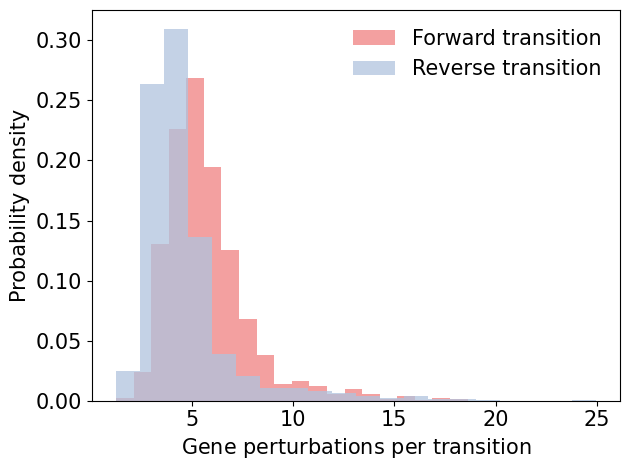

In [321]:
plt.hist(np.sum(Af, axis=1), 20, density=True, alpha=0.75, label='Forward transition', color = 'lightcoral')
plt.hist(np.sum(Ar, axis=1), 20, density=True, alpha=0.75, label='Reverse transition', color = 'lightsteelblue')

# Set x and y labels
plt.xlabel(r'$\mathrm{Gene~perturbations~per~transition}$', fontsize=15)
plt.ylabel('Probability density', fontsize=15)

# Set tick parameters
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Show legend
plt.legend(fontsize=15,frameon=False)
plt.tight_layout()
plt.savefig('fig3c.pdf')
# Display the plot
# plt.tight_layout()
plt.show()
